## Project E-Commerce: Product Range Analysis

**Description**

The main goal of this analysis is to study the prodcut assortment of the store, identify and distingush best-selling products from least selling products and draw conclusions on how to improve the general revenue of the store. 

My approach to the analysis is that given the large amount of parameters in the data we can categorize the store products into product categories and by focusing on specific parameters we can distinguish between similiar product groups in price, revenue, quantity and linearity. Finally, we can observe and deduct which groups need more attention and further analysis in order to generate more profit to the store. 


Procedure:

- Data overview and preprocessesing:

Analysing data for duplicates and null values.

Adding new columns, changing existing column data types if needed and organizing the data.

grouping products by descritpion column

Analyzing variable distribution and correlations.


- Exploratory data preprocessing of the dataset:

Plotting histograms of monthly distribution based on revenue, quantity and new users. 

Categorising products into groups

Analyzing product groups for product quantity, product price and revenue.

analyaing leading products in terms of orders/returns/quantity/price and revenue 

- Statistical data analysis:

Observing differences in average price,revenue and quantity of leading product categories


- Notes and Reccomendations:  

See below


- **Dashboard**

[Dashboard](https://public.tableau.com/views/ProductCategoryRange/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link)

- **Presentation**

[Presentation](https://drive.google.com/file/d/1sXPAhxo5xJ40OBPDpiW6zQjwlhUExkvp/view?usp=sharing)



- sources:


https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

https://seaborn.pydata.org/index.html

https://www.dotactiv.com/blog/product-range-review

In [1]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math as mth
import pandas.core.algorithms as algos
from pandas import Series
import sidetable
import plotly.offline as pyoff
import plotly as py
import pandas.core.algorithms as algos
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import squarify
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import f_oneway


# ------

import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter


# Data Overview and Preprocessing

**Data overview**

In [4]:
#Data

try:
    data = pd.read_csv('/Users/jenya/Desktop/Prctcm_Projects/FProject/ecommerce_dataset_us.csv', sep='\t',parse_dates=['InvoiceDate'])

except:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv',sep = '\t',parse_dates = ['InvoiceDate'])



#save a copy of the original data
data_og=data

Check if data types are right.

In [5]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
dtype: object

Checking the data for missing values, duplicates and outliers.

In [6]:
def explore(data):
    (print('data properties:'))
    print('----'*10)
    print('shape of the data set')
    print(data.shape)
    print('----'*10)
    print(data.info())
    print('----'*20)
    print('columns - descriptions')
    print(data.describe(include='all'))
    print('----'*20)
    print('first rows')
    display(data.head(5))
    print('----'*20)
    print('last rows')
    display(data.tail(5))
    print('----'*20)
    print('Missing values:')
    display(data.stb.missing(style=True))
    print('*********')
    print('Duplicates:')
    print(data.duplicated().sum())
    print('----'*20)


In [7]:
 # A function for checking zeros
def zero(data):
    for row in data:
        print('N of zero values on column {}:'.format(row))
        print(len(data[data[row] == 0]))

In [8]:
explore(data)
zero(data)

data properties:
----------------------------------------
shape of the data set
(541909, 7)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB
None
--------------------------------------------------------------------------------
columns - descriptions
       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909         

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


--------------------------------------------------------------------------------
last rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2019-12-07 12:50:00,4.95,12680.0


--------------------------------------------------------------------------------
Missing values:


,missing,total,percent
CustomerID,"135,080","541,909",24.93%
Description,"1,454","541,909",0.27%
InvoiceNo,0,"541,909",0.00%
StockCode,0,"541,909",0.00%
Quantity,0,"541,909",0.00%
InvoiceDate,0,"541,909",0.00%
UnitPrice,0,"541,909",0.00%


*********
Duplicates:
5268
--------------------------------------------------------------------------------
N of zero values on column InvoiceNo:
0
N of zero values on column StockCode:
0
N of zero values on column Description:
0
N of zero values on column Quantity:
0
N of zero values on column InvoiceDate:
0
N of zero values on column UnitPrice:
2515
N of zero values on column CustomerID:
0


**Summary:**

There are 541909 rows each represents a purchase of items. Not every row represents an order as there can be several rows of the same orders.

The data contains the following 7 columns:

`InvoiceNo`: 

Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

`StockCode`:

Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

`Description`: 

Product (item) name. Nominal.

`Quantity`: 

The quantities of each product (item) per transaction. Numeric.

`InvoiceDate`: 

Invoice Date and time. Numeric, the day and time when each transaction was generated.

`UnitPrice`: 

Unit price. Numeric, Product price per unit in sterling.

`CustomerID`: 

Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.



columns data type:

- invoiceno has values with numbers and letters so it has to be an object data type.
- stockcode has values with numbers and letters so it has to be an object data type.

looking from the data:

- There are missing values in customerid column.
- Quantity column has negative values that look like the they have equivalent positive values, could be a return items perhaps. 
- theres 5268 duplicates in the data, we might remove them for their small amount. 
- Missing values in descripion column that are need to checked.
- Descriptions are written in CAPS.
- lowcasing of several columns is required.
- 2515 zero values in UnitPrice column - maybe theres an explanation in other columns on the row.
- CostumerID column has 25% missing values. 

--------------------------------

**Preprocessing Procedure:**

- Lowcase column names, maybe description column too.

- dtype convertions.

- Deal with missing values in description and customerid columns

- checking lowercase description values.

- Take care of duplicates.

- make a total purchase price column

- Check range of dates.

- Adding date column

In [9]:
# Lowcase column names

data.columns=data.columns.str.lower()

In [10]:
# dtype convertions.

data['quantity'] = pd.to_numeric(data['quantity'], downcast='integer')

data['unitprice'] = pd.to_numeric(data['unitprice'], downcast='float')

data['invoicedate'] = pd.to_datetime(data['invoicedate'], format ="%d%m%YT%H:%M")


In [11]:
# Dealing with missing values
col_null = data[data['customerid'].isnull()]
col_null.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN


We see that there are rows with missing description and customerid values.

Given that every product has a unique stockcode we can try filling missing discription values with discription values that has similiar stockcode values. 

In [12]:
nulls=data[data['description'].isnull()]['customerid'].isnull()
nulls.sum()

1454

In [13]:
data['description'].fillna(data.groupby('stockcode')['description'].transform('first'),inplace=True)

In [14]:
print(data.isnull().sum()['description'])
print('---')
print(data[data['description'].isnull()])

112
---
       invoiceno stockcode description  quantity         invoicedate  \
1970      536545     21134        None         1 2018-11-29 14:32:00   
1987      536549    85226A        None         1 2018-11-29 14:34:00   
1988      536550     85044        None         1 2018-11-29 14:34:00   
2024      536552     20950        None         1 2018-11-29 14:34:00   
2026      536554     84670        None        23 2018-11-29 14:35:00   
...          ...       ...         ...       ...                 ...   
280754    561498     21610        None       -14 2019-07-25 14:10:00   
281615    561555    37477B        None       -11 2019-07-26 10:21:00   
281616    561557    37477C        None       -31 2019-07-26 10:21:00   
346849    567207    35592T        None         4 2019-09-17 11:01:00   
497301    578360    84971L        None         2 2019-11-22 10:36:00   

        unitprice  customerid  
1970          0.0         NaN  
1987          0.0         NaN  
1988          0.0         NaN  

In [15]:
print(data[data['description'].isnull()].customerid.value_counts())
print(data[data['description'].isnull()].customerid.value_counts())

Series([], Name: customerid, dtype: int64)
Series([], Name: customerid, dtype: int64)


These values are missing 112 values on description columns have nan values on unitprice and custoemrid columns aswell.
it seems that we cant draw much inforamtion for them so we better remove them for the analysis.

In [16]:
data = data.dropna(subset=['description'])

In [17]:
data

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0


In [18]:
invoice_null = list(col_null['invoiceno'].unique())
invoice_null

['536414',
 '536544',
 '536545',
 '536546',
 '536547',
 '536549',
 '536550',
 '536552',
 '536553',
 '536554',
 '536555',
 '536558',
 '536565',
 '536589',
 '536592',
 '536596',
 '536640',
 '536755',
 '536756',
 '536764',
 '536765',
 '536780',
 '536801',
 '536862',
 '536864',
 '536865',
 '536866',
 '536876',
 '536883',
 '536885',
 '536920',
 '536941',
 '536942',
 '536982',
 '536991',
 '536995',
 '536996',
 '536997',
 '536998',
 '536999',
 '537000',
 '537001',
 '537002',
 '537003',
 '537004',
 '537005',
 '537006',
 '537007',
 '537008',
 '537009',
 '537010',
 '537011',
 '537012',
 '537013',
 '537014',
 '537015',
 '537016',
 '537017',
 '537018',
 '537019',
 '537020',
 '537021',
 '537025',
 '537027',
 '537028',
 '537029',
 '537032',
 '537220',
 '537230',
 '537237',
 '537240',
 'C537251',
 '537252',
 '537253',
 '537361',
 '537363',
 '537364',
 '537401',
 '537411',
 '537425',
 '537426',
 '537427',
 '537430',
 '537432',
 '537434',
 '537436',
 '537437',
 '537438',
 '537439',
 '537442',
 '537449'

In [19]:
data[data['invoiceno'].isin(invoice_null)]['customerid'].unique()


array([nan])

All invoiceno values that have missing customerid values dont belong to any other customerid. There is no way for us to fill this missing values. 

Other option is to fill missing customerid with nan. 

In [20]:
# Dealing with missing values in customerid column.
data=data.fillna('nan')

In [21]:
data['customerid'].value_counts()

nan        134968
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
15389.0         1
18184.0         1
15668.0         1
13747.0         1
15510.0         1
Name: customerid, Length: 4373, dtype: int64

In [22]:
data['description'].str.islower().value_counts()

False    541302
True        495
Name: description, dtype: int64

In [23]:
lowcase_desc=data[data['description'].str.islower()]
lowcase_desc

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
6391,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,nan
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,nan
13217,537425,84968F,check,-20,2018-12-04 15:35:00,0.0,nan
13218,537426,84968E,check,-35,2018-12-04 15:36:00,0.0,nan
13264,537432,35833G,damages,-43,2018-12-04 16:10:00,0.0,nan
...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2019-12-05 18:36:00,0.0,nan
535335,581212,22578,lost,-1050,2019-12-05 18:38:00,0.0,nan
535336,581213,22576,check,-30,2019-12-05 18:38:00,0.0,nan
536908,581226,23090,missing,-338,2019-12-06 09:56:00,0.0,nan


In [24]:
lowcase_desc['description'].value_counts()

check                       159
damages                      45
damaged                      43
found                        25
sold as set on dotcom        20
                           ... 
mix up with c                 1
wrong code?                   1
found some more on shelf      1
dotcomstock                   1
wrong barcode (22467)         1
Name: description, Length: 127, dtype: int64

In [25]:
display(lowcase_desc['customerid'].value_counts())

nan    495
Name: customerid, dtype: int64

all these descriptions are technical and dont describe products or purchases. (or costumers since all customerid values are NaN.)

Its a strong enough evidance that allows us to ommit these values.

In [26]:
data = data.query('~description.str.islower()')

In [27]:
display(data.stb.missing(style=True))

,missing,total,percent
invoiceno,0,"541,302",0.00%
stockcode,0,"541,302",0.00%
description,0,"541,302",0.00%
quantity,0,"541,302",0.00%
invoicedate,0,"541,302",0.00%
unitprice,0,"541,302",0.00%
customerid,0,"541,302",0.00%


Theres no more missing values in the data anymore.

Rows with missing descriptions and customerid values recieved 'nan' value 

In [28]:
# dealing with duplicates.
duplicates=data[data.duplicated()]

duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 517 to 541701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   invoiceno    5268 non-null   object        
 1   stockcode    5268 non-null   object        
 2   description  5268 non-null   object        
 3   quantity     5268 non-null   int32         
 4   invoicedate  5268 non-null   datetime64[ns]
 5   unitprice    5268 non-null   float32       
 6   customerid   5268 non-null   object        
dtypes: datetime64[ns](1), float32(1), int32(1), object(4)
memory usage: 288.1+ KB


In [29]:
print(data.duplicated().sum() / len(data))

display(duplicates.head())

0.009732090404247537


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0


In [30]:
display(duplicates.groupby('stockcode')['description'].value_counts())

stockcode  description                 
10120      DOGGY RUBBER                    1
10125      MINI FUNKY DESIGN TAPES         1
10133      COLOURING PENCILS BROWN TUBE    2
10135      COLOURING PENCILS BROWN TUBE    2
15039      SANDALWOOD FAN                  1
                                          ..
90200D     PINK SWEETHEART BRACELET        1
90206C     CRYSTAL DIAMANTE STAR BROOCH    1
90209B     GREEN ENAMEL+GLASS HAIR COMB    1
M          Manual                          5
S          SAMPLES                         1
Name: description, Length: 1735, dtype: int64

In [31]:
duplicates.describe(include='all',datetime_is_numeric=True)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
count,5268,5268,5268,5268.000000,5268,5268.000000,5268.0
unique,1933,1706,1732,NaN,NaN,NaN,961.0
top,555524,21034,REX CASH+CARRY JUMBO SHOPPER,NaN,NaN,NaN,12748.0
freq,34,55,55,NaN,NaN,NaN,183.0
mean,NaN,NaN,NaN,2.647684,2019-07-22 05:19:06.799544576,2.416667,NaN
min,NaN,NaN,NaN,-1296.000000,2018-11-29 11:45:00,0.000000,NaN
25%,NaN,NaN,NaN,1.000000,2019-04-01 15:07:00,0.950000,NaN
50%,NaN,NaN,NaN,1.000000,2019-09-10 13:29:30,1.650000,NaN
75%,NaN,NaN,NaN,2.000000,2019-11-07 12:52:00,2.950000,NaN
max,NaN,NaN,NaN,1440.000000,2019-12-07 11:34:00,19.950001,NaN


In [32]:
data = data.drop_duplicates()

By looking at the duplicated values it seems like there are no clear explanation for the duplications. Concidering the duplicted amount of rows its best to just remove them.

In [33]:
# making a revenue column
data['revenue'] = data['unitprice'] * data['quantity']



In [34]:
data['revenue'] = pd.to_numeric(data['revenue'], downcast='float') # for clustering model

We will use this column when comparing between cluster groups

In [35]:
# dealing with negative values: unitprice
neg_price = data[data['unitprice']<0]
neg_price

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.05957,nan,-11062.05957
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.05957,nan,-11062.05957


In [36]:
neg_price_description = list(neg_price['description'].unique())

In [37]:
data[data['description'].isin(neg_price_description)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.05957,nan,11062.05957
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.05957,nan,-11062.05957
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.05957,nan,-11062.05957


In [38]:
data[data['stockcode']=='B']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.05957,nan,11062.05957
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.05957,nan,-11062.05957
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.05957,nan,-11062.05957


Observing from the column values it looks like system functions and are not related in any way to products or customers.
its best to remove those rows from the data.

In [39]:
data = data.query('stockcode !="B"')

In [40]:
# Taking care of negative values: quantity
neg_quantity = data[data['quantity']<0]
neg_quantity

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.500000,14527.0,-27.500000
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.650000,15311.0,-4.650000
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.650000,17548.0,-19.799999
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.290000,17548.0,-6.960000
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.290000,17548.0,-6.960000
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.830000,14397.0,-9.130000
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.690002,15498.0,-224.690002
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.950000,15311.0,-54.750000
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.250000,17315.0,-1.250000


In [41]:
neg_quantity['description'].value_counts()

Manual                                 244
REGENCY CAKESTAND 3 TIER               180
POSTAGE                                126
JAM MAKING SET WITH JARS                87
Discount                                77
                                      ... 
ORIGAMI VANILLA INCENSE/CANDLE SET       1
HEART MIRROR ANTIQUE WHITE               1
SET/10 IVORY POLKADOT PARTY CANDLES      1
ROUND BLUE CLOCK WITH SUCKER             1
BLUE SCOTTIE DOG W FLOWER PATTERN        1
Name: description, Length: 2388, dtype: int64

In [42]:
neg_quantity['stockcode'].value_counts()

M        244
22423    180
POST     126
22960     87
D         77
        ... 
23523      1
23437      1
22372      1
23342      1
22515      1
Name: stockcode, Length: 2359, dtype: int64

In [43]:
display(neg_quantity.query('stockcode == "22423"'))

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
12402,C537373,22423,REGENCY CAKESTAND 3 TIER,-1,2018-12-04 12:55:00,12.75,14487.0,-12.750000
14535,C537602,22423,REGENCY CAKESTAND 3 TIER,-2,2018-12-05 12:45:00,10.95,17511.0,-21.900000
18133,C537797,22423,REGENCY CAKESTAND 3 TIER,-2,2018-12-06 13:07:00,10.95,13113.0,-21.900000
18247,C537812,22423,REGENCY CAKESTAND 3 TIER,-10,2018-12-06 13:33:00,10.95,14299.0,-109.500000
21760,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2018-12-07 15:43:00,12.75,15329.0,-12.750000
...,...,...,...,...,...,...,...,...
516185,C579878,22423,REGENCY CAKESTAND 3 TIER,-1,2019-11-28 17:12:00,12.75,17340.0,-12.750000
516559,C579933,22423,REGENCY CAKESTAND 3 TIER,-1,2019-11-29 09:44:00,12.75,14853.0,-12.750000
523337,C580507,22423,REGENCY CAKESTAND 3 TIER,-1,2019-12-02 13:37:00,12.75,15867.0,-12.750000
536911,C581228,22423,REGENCY CAKESTAND 3 TIER,-6,2019-12-06 10:06:00,10.95,16019.0,-65.699997


In [44]:
display(neg_quantity.query('stockcode == "22960"'))

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2018-11-29 12:38:00,4.25,17897.0,-25.50
13055,C537417,22960,JAM MAKING SET WITH JARS,-1,2018-12-04 15:12:00,4.25,13481.0,-4.25
19352,C537853,22960,JAM MAKING SET WITH JARS,-2,2018-12-06 15:57:00,4.25,13370.0,-8.50
29054,C538693,22960,JAM MAKING SET WITH JARS,-2,2018-12-12 09:59:00,4.25,16558.0,-8.50
29523,C538802,22960,JAM MAKING SET WITH JARS,-4,2018-12-12 11:54:00,4.25,17017.0,-17.00
...,...,...,...,...,...,...,...,...
464973,C576194,22960,JAM MAKING SET WITH JARS,-3,2019-11-12 12:03:00,4.25,16790.0,-12.75
464997,C576199,22960,JAM MAKING SET WITH JARS,-6,2019-11-12 12:13:00,4.25,12610.0,-25.50
465285,C576216,22960,JAM MAKING SET WITH JARS,-3,2019-11-12 12:56:00,4.25,12584.0,-12.75
526968,C580686,22960,JAM MAKING SET WITH JARS,-1,2019-12-03 15:28:00,4.25,15984.0,-4.25


It seemes like this products are being cancelled frequenlty.

In [45]:
neg_quantity_invoiceno = list(neg_quantity['invoiceno'].unique())

In [46]:
data[data['invoiceno'].isin(neg_quantity_invoiceno)]['invoiceno'].value_counts()

C570867    101
C560540     57
C548460     45
C560855     40
C570828     39
          ... 
C538798      1
C566469      1
C572927      1
C579931      1
C579791      1
Name: invoiceno, Length: 4709, dtype: int64

In [47]:
neg_quantity_decription = list(neg_quantity['description'].unique())

In [48]:
data[data['description'].isin(neg_quantity_decription)]['description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
                                      ... 
WHITE CHERRY LIGHTS                      1
Thrown away.                             1
Missing                                  1
???                                      1
damages/credits from ASOS.               1
Name: description, Length: 2388, dtype: int64

The majority of rows with negative quantity values are order cancellations.

Lets look at invoiveno values of rows with negative quantity values.

In [49]:
neg_quantity_invoice = list(neg_quantity['invoiceno'].unique())

In [50]:
data_neg_quantity_invoice = data[data['invoiceno'].isin(neg_quantity_invoice)]
data_neg_quantity_invoice

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.500000,14527.0,-27.500000
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.650000,15311.0,-4.650000
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.650000,17548.0,-19.799999
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.290000,17548.0,-6.960000
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.290000,17548.0,-6.960000
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.830000,14397.0,-9.130000
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.690002,15498.0,-224.690002
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.950000,15311.0,-54.750000
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.250000,17315.0,-1.250000


In [51]:
data_neg_quantity_invoice.describe(include='all')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue
count,10124,10124,10124,10124.000000,10124,10124.000000,10124,10124.000000
unique,4709,2359,2388,NaN,4492,NaN,1590,NaN
top,C570867,M,Manual,NaN,2019-10-10 16:17:00,NaN,nan,NaN
freq,101,244,244,NaN,101,NaN,1252,NaN
first,NaN,NaN,NaN,NaN,2018-11-29 09:41:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-07 11:58:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,-37.625642,NaN,44.382168,NaN,-88.303017
std,NaN,NaN,NaN,1105.947356,NaN,638.621948,NaN,1953.991943
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,NaN,-168469.593750
25%,NaN,NaN,NaN,-8.000000,NaN,1.250000,NaN,-16.950001


In [52]:
data_neg_quantity_invoice[data_neg_quantity_invoice['quantity']>0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue


There are 9762 rows with neagtive quantity values.

Theres 4310 unique invoiceno values. Not all of them are products, most of them represent discounts/cancellations etc.

2111 unique stockcode values in which 'M' is most used for 244 rows- with 'manual' as its descritpion value.

this values represent either system features or products return rather than system errors.

In [53]:
# Adding dates columns

data['date'] = data['invoicedate'].dt.date
data['month'] = data['invoicedate'].dt.to_period('M')

In [54]:
# Check range of dates.
print(data['date'].min())
print(data['date'].max())
print(data['date'].max()-data['date'].min())

2018-11-29
2019-12-07
373 days, 0:00:00


 the data range if going from 2018-11-29 until 2019-12-07. In total of 373 days.

In [55]:
print(data['month'])

0         2018-11
1         2018-11
2         2018-11
3         2018-11
4         2018-11
           ...   
541904    2019-12
541905    2019-12
541906    2019-12
541907    2019-12
541908    2019-12
Name: month, Length: 536031, dtype: period[M]


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536031 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    536031 non-null  object        
 1   stockcode    536031 non-null  object        
 2   description  536031 non-null  object        
 3   quantity     536031 non-null  int32         
 4   invoicedate  536031 non-null  datetime64[ns]
 5   unitprice    536031 non-null  float32       
 6   customerid   536031 non-null  object        
 7   revenue      536031 non-null  float32       
 8   date         536031 non-null  object        
 9   month        536031 non-null  period[M]     
dtypes: datetime64[ns](1), float32(2), int32(1), object(5), period[M](1)
memory usage: 38.9+ MB


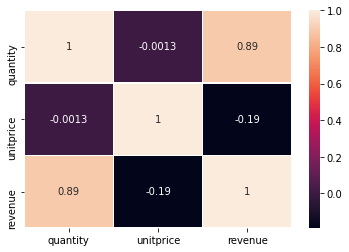

In [57]:
# Correlation matrix
sns.heatmap(data.corr(), annot = True, linewidths = .4)
plt.show()

In [58]:
data.describe()

,quantity,unitprice,revenue
count,536031.000000,536031.000000,536031.000000
mean,9.795081,4.658566,18.165121
std,217.913581,93.701431,379.971161
min,-80995.000000,0.000000,-168469.593750
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400002
max,80995.000000,38970.000000,168469.593750


In [59]:
data.query('quantity < 0').sort_values('quantity',ascending=False)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0,-27.500000,2018-11-29,2018-11
152578,C549666,84839,SWEETHEART KEY CABINET,-1,2019-04-09 12:17:00,5.55,13113.0,-5.550000,2019-04-09,2019-04
152844,C549692,85053,FRENCH ENAMEL CANDLEHOLDER,-1,2019-04-09 13:43:00,1.69,13668.0,-1.690000,2019-04-09,2019-04
152728,C549688,20726,LUNCH BAG WOODLAND,-1,2019-04-09 13:36:00,1.65,15449.0,-1.650000,2019-04-09,2019-04
152710,C549685,85132A,CHARLIE + LOLA BISCUITS TINS,-1,2019-04-09 13:26:00,1.95,13266.0,-1.950000,2019-04-09,2019-04
...,...,...,...,...,...,...,...,...,...,...
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2019-10-29 15:17:00,0.00,nan,-0.000000,2019-10-29,2019-10
225528,556687,23003,Printing smudges/thrown away,-9058,2019-06-12 10:36:00,0.00,nan,-0.000000,2019-06-12,2019-06
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2018-11-30 14:23:00,0.03,15838.0,-280.799988,2018-11-30,2018-11
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346.0,-77183.593750,2019-01-16,2019-01


---------------------------------------------------------------------------------------

**summary**

- We lowercased all column names for the filtered data. and looked into lowercase description values, many of them represent technical trancitions such as discounts,cancellations and alike. For the sake of the product analysis we removed some of this values to prevent them from effecting the results of the analysis.


`A reccomendation for future data management` **:** Its a good precaution to dedicate a column that will represent returns/cancellations/manual transitions etc., such columns will help in maintaining a better dataset organizations and modularity.


- for dtype convertions We downgraded the columns: quantitiy, unitprice and total. Also converted invoicedate column to datetime dtype. We also added additional columns for the further use: a month, date and a revenue column


- We replaced missing values in description coliumn with values that share the same stockcode values. The remaining 112 columns with missing descripiton values dont have unitprice and customerid values so we dropped them.


- looking at the data duplicates, 5268 rows,  We decided that we cant removing this amount of data without a clear reason to do so and since we didnt find one we chose to leave them in the data.


- The range of dates in the data is staring from 2018-11-29 until 2019-12-07 that is a total of 373 days.


- Looking at the correlation matrix of the numeral columns in the data theres a distinct 0.9 corrlation between revenue and quantity columns - It might indicate that low price products generate higher revenue than high price products or its just that high quantity generate high revenue. 

-----------------------------------------------------

### Exploratory Data Analysis 

- Plotting histograms of monthly distribution based on revenue, quantity and orders.
- Distribution of prices per unit
- Product price range
- Distribution of product quantity
- Distribution of cancelled orders
- categorizing the products
- Distribution of revenue


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536031 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    536031 non-null  object        
 1   stockcode    536031 non-null  object        
 2   description  536031 non-null  object        
 3   quantity     536031 non-null  int32         
 4   invoicedate  536031 non-null  datetime64[ns]
 5   unitprice    536031 non-null  float32       
 6   customerid   536031 non-null  object        
 7   revenue      536031 non-null  float32       
 8   date         536031 non-null  object        
 9   month        536031 non-null  period[M]     
dtypes: datetime64[ns](1), float32(2), int32(1), object(5), period[M](1)
memory usage: 38.9+ MB


In [61]:
data_days=data.groupby('invoiceno').agg({'date':['nunique','first']}).reset_index()
data_days.columns=['invoiceno','unique_date','date']

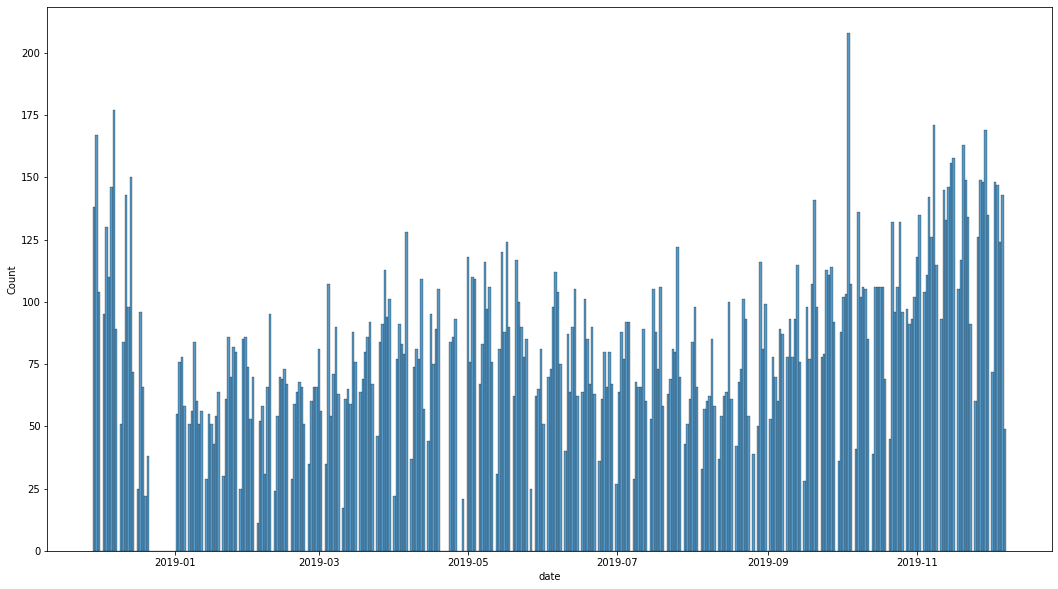

In [62]:
plt.figure(figsize=(18, 10))
sns.histplot(data_days,x='date')
plt.show()

Theres no purchases at the end of 2018, probably because of chrismas holiday season.

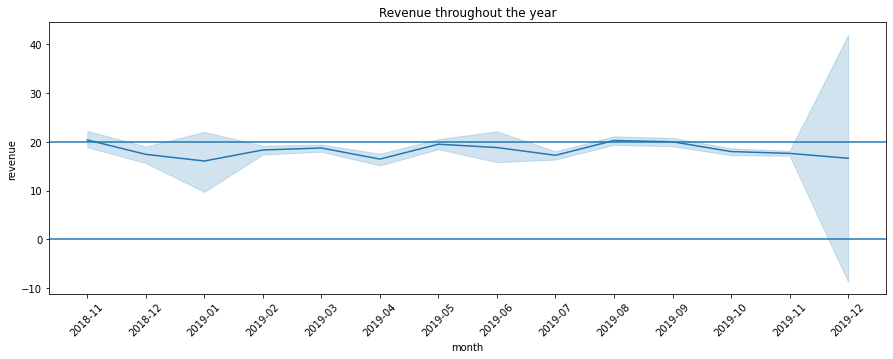

In [63]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=data.month.astype(str), y=data.revenue)
ax.axhline(20)
ax.axhline(0)
ax.set_title('Revenue throughout the year')
ax.tick_params(axis='x', labelrotation=45)

In [64]:
data.query('month > "2019-11"').sort_values(by='revenue')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.080000,16446.0,-168469.593750,2019-12-07,2019-12
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2019-12-03 11:36:00,17836.460938,nan,-17836.460938,2019-12-03,2019-12
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2019-12-03 11:35:00,11586.500000,nan,-11586.500000,2019-12-03,2019-12
528087,C580726,CRUK,CRUK Commission,-1,2019-12-03 17:17:00,1100.439941,14096.0,-1100.439941,2019-12-03,2019-12
531819,C580971,22313,OFFICE MUG WARMER PINK,-250,2019-12-04 15:04:00,2.550000,14298.0,-637.500000,2019-12-04,2019-12
...,...,...,...,...,...,...,...,...,...,...
534952,581175,23084,RABBIT NIGHT LIGHT,1440,2019-12-05 15:16:00,1.790000,14646.0,2577.599854,2019-12-05,2019-12
540061,581457,23543,WALL ART KEEP CALM,698,2019-12-06 18:43:00,4.150000,18102.0,2896.699951,2019-12-06,2019-12
537883,581375,21137,BLACK RECORD COVER FRAME,960,2019-12-06 12:36:00,3.390000,16210.0,3254.400146,2019-12-06,2019-12
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2019-12-05 12:20:00,2.750000,15195.0,3861.000000,2019-12-05,2019-12


We have a big order cancellation that disrupts the data at the end of the year, lets remove it and check the plot again.

In [65]:
data = data[data.description != 'PAPER CRAFT , LITTLE BIRDIE']

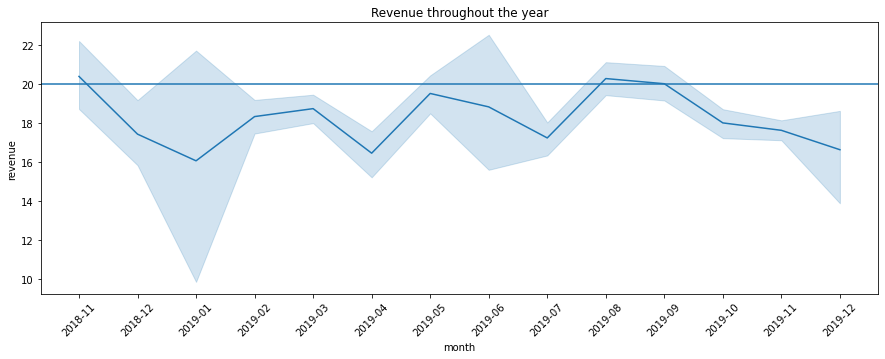

In [66]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=data.month.astype(str), y=data.revenue)
ax.axhline(20)

ax.set_title('Revenue throughout the year')
ax.tick_params(axis='x', labelrotation=45)

The distribuiton of revenue thrughout the year seems stable. Apart from the 2 month duration between 12-2018 to 02-2019, Which looks like a large amount of order cancellations, yearly fees and payments(presumably, such as AMAZONFEE).

In [67]:
data.query('"2018-12" < month < "2019-02"').sort_values(by='revenue')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.040000,12346.0,-77183.593750,2019-01-16,2019-01
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:55:00,16888.019531,nan,-16888.019531,2019-01-03,2019-01
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:57:00,16453.710938,nan,-16453.710938,2019-01-03,2019-01
73446,C542348,M,Manual,-1,2019-01-25 12:09:00,1715.849976,12539.0,-1715.849976,2019-01-25,2019-01
64570,C541651,M,Manual,-1,2019-01-18 11:48:00,1283.800049,nan,-1283.800049,2019-01-18,2019-01
...,...,...,...,...,...,...,...,...,...,...
52134,540689,22470,HEART OF WICKER LARGE,1284,2019-01-09 08:43:00,3.210000,17450.0,4121.640137,2019-01-09,2019-01
52772,540818,48185,DOORMAT FAIRY CAKE,670,2019-01-09 12:57:00,6.750000,15749.0,4522.500000,2019-01-09,2019-01
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2019-01-09 12:55:00,2.550000,15749.0,4921.500000,2019-01-09,2019-01
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-01-09 12:55:00,2.100000,15749.0,6539.399902,2019-01-09,2019-01


In [68]:
data.query('"2019-05" < month < "2019-07"').sort_values(by='quantity')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
225528,556687,23003,Printing smudges/thrown away,-9058,2019-06-12 10:36:00,0.00,nan,-0.00,2019-06-12,2019-06
224419,C556522,22920,HERB MARKER BASIL,-1515,2019-06-11 11:21:00,0.55,16938.0,-833.25,2019-06-11,2019-06
234765,557600,23117,Damaged,-1440,2019-06-19 11:35:00,0.00,nan,-0.00,2019-06-19,2019-06
234764,557599,23116,Damaged,-1440,2019-06-19 11:34:00,0.00,nan,-0.00,2019-06-19,2019-06
229728,557108,23113,Damaged,-1440,2019-06-14 15:58:00,0.00,nan,-0.00,2019-06-14,2019-06
...,...,...,...,...,...,...,...,...,...,...
230315,557135,22616,PACK OF 12 LONDON TISSUES,864,2019-06-15 09:12:00,0.25,17306.0,216.00,2019-06-15,2019-06
221744,556267,15034,PAPER POCKET TRAVELING FAN,1200,2019-06-07 19:33:00,0.07,13694.0,84.00,2019-06-07,2019-06
223446,556484,22920,HERB MARKER BASIL,1515,2019-06-10 13:17:00,0.55,16938.0,833.25,2019-06-10,2019-06
221722,556267,16216,LETTER SHAPE PENCIL SHARPENER,1600,2019-06-07 19:33:00,0.06,13694.0,96.00,2019-06-07,2019-06


Here we can see that the problematic month 2018-11 have weird values since there arent many purchases at those months but the deviations are huge. 

In [69]:
data = data[data.description != 'MEDIUM CERAMIC TOP STORAGE JAR']

#This value is problematic and disrupts the revenue on 2019-01

In [70]:
data = data[data.invoiceno != '556231']
data = data[data.invoiceno != '546139']
data = data[data.invoiceno != '554550']
data = data[data.invoiceno != '580547']
data = data[data.invoiceno != '538090']
data = data[data.invoiceno != '85123A']
data = data[data.invoiceno != '84988']
data = data[data.invoiceno != '47566B']

These values are technical and doesnt represent products. its better to remove them.



In [71]:
data.query('month == "2019-01"').sort_values(by='quantity')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month


Whats interesting in this plot is that most of the product returns,restucking or mass purchases are at months 11 and 1.

This pattern alligns with the revenue drops we observed at the same months aswell

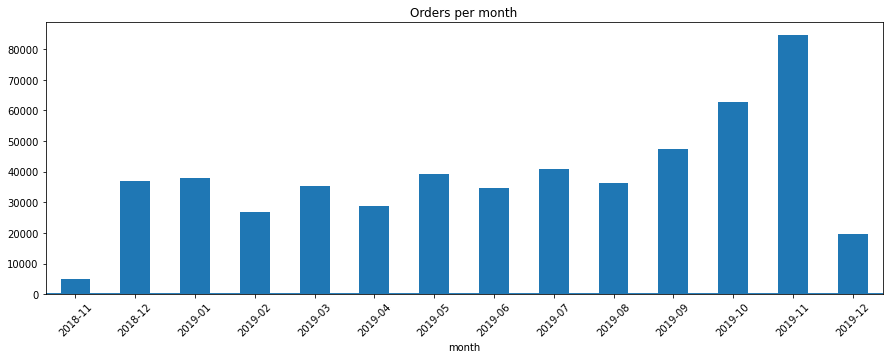

In [72]:
plt.figure(figsize=(15, 5))
ax = data.groupby('month')['invoiceno'].count().plot(kind='bar')
ax.set_title('Orders per month')
ax.axhline(20)
ax.axhline(0)
ax.tick_params(axis='x', labelrotation=45)

In [73]:
invoices = data.groupby('invoiceno').agg({'stockcode':'nunique','quantity':'sum', 'revenue':'sum' }).reset_index()
invoices.describe()

,stockcode,quantity,revenue
count,25281.000000,25281.000000,25281.000000
mean,20.978245,207.260037,384.986664
std,42.886763,535.346098,1188.936157
min,1.000000,-9360.000000,-38970.000000
25%,2.000000,12.000000,22.200001
50%,10.000000,105.000000,214.740005
75%,24.000000,244.000000,414.570007
max,1109.000000,14953.000000,52940.937500


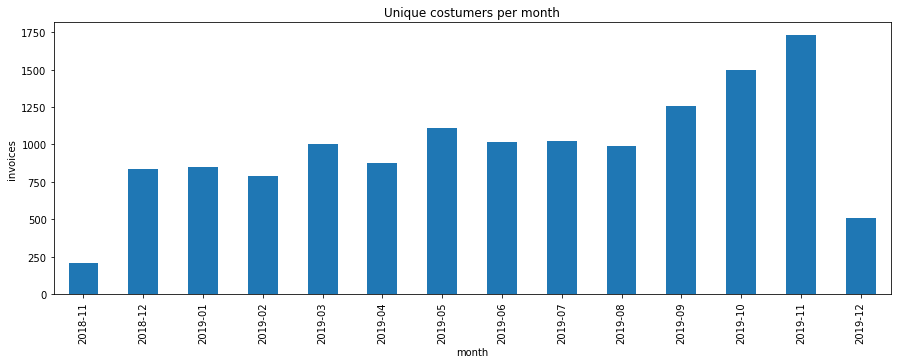

In [74]:
plt.figure(figsize=(15,5))
ax = data.groupby('month')['customerid'].nunique().plot(kind='bar')
ax.set_title('Unique costumers per month')
plt.ylabel('invoices')
plt.xlabel('month')
plt.show()

In [75]:
costumers = data.groupby('customerid').agg({'invoiceno':'nunique','revenue':'sum'}).reset_index()
costumers.describe()

,invoiceno,revenue
count,4372.000000,4.372000e+03
mean,5.782479,2.226177e+03
std,47.655287,2.350770e+04
min,1.000000,-4.287630e+03
25%,1.000000,2.919700e+02
50%,3.000000,6.440700e+02
75%,5.000000,1.610510e+03
max,3095.000000,1.458265e+06


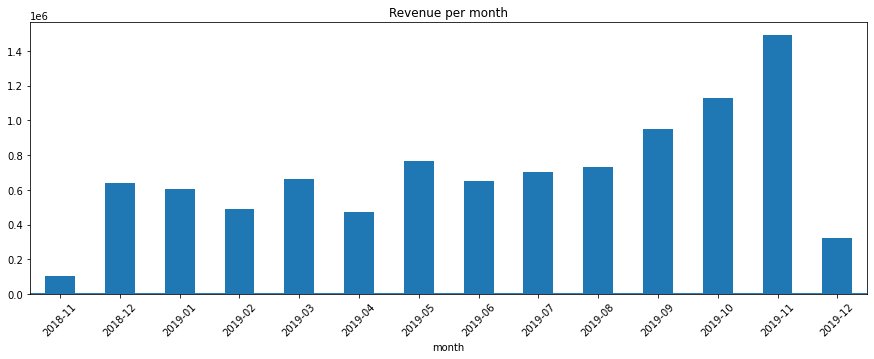

In [76]:
plt.figure(figsize=(15, 5))
ax = data.groupby('month')['revenue'].sum().plot(kind='bar')
ax.set_title('Revenue per month')
ax.axhline(20)
ax.axhline(0)
ax.tick_params(axis='x', labelrotation=45)

------------------------

**price range of products**

In [77]:
data.unitprice.describe()

count    535764.000000
mean          4.660172
std          93.724747
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unitprice, dtype: float64

In [78]:
print(data.unitprice.head())
print()
print(data.unitprice.tail())

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
Name: unitprice, dtype: float32

541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: unitprice, dtype: float32


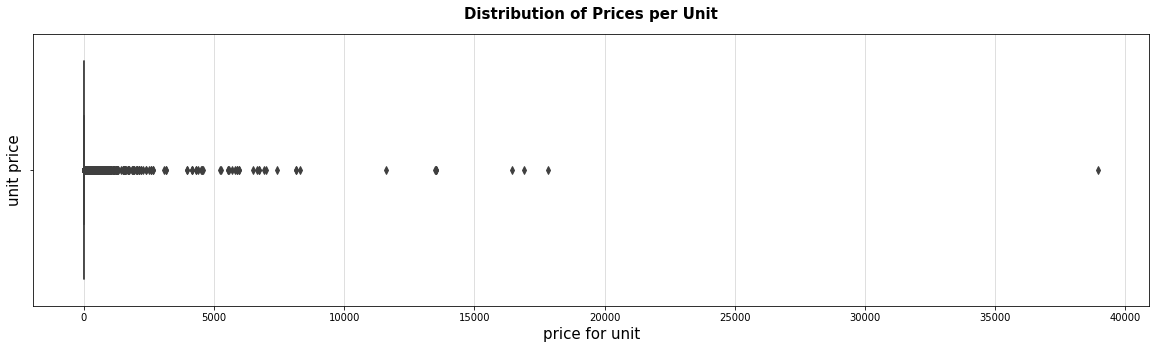

In [79]:
plt.figure(figsize=(20,5))
sns.boxplot(x=data['unitprice'])

plt.title("Distribution of Prices per Unit", fontsize=15, fontweight="bold", pad=15)

plt.xlabel('price for unit', fontsize=15)
plt.ylabel("unit price", fontsize=15)
plt.grid(axis='x',alpha=0.5)
plt.show()

In [80]:
# Let's see the most outlyers descriptions
data[data['unitprice']>300].stockcode.unique()

array(['DOT', 'M', 'AMAZONFEE', 'BANK CHARGES', 'POST', 'D', '22502', 'S',
       'CRUK'], dtype=object)

all values with a unitprice higher than 300 are not really products rows so we can remove them from the dataset.

In [81]:
data = data[(data.unitprice < 300)]

In [82]:
data[data['unitprice'] >200].head(50)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2018-11-30 18:06:00,295.000000,13145.0,295.000000,2018-11-30,2018-11
5450,536862,DOT,DOTCOM POSTAGE,1,2018-12-01 11:13:00,254.429993,nan,254.429993,2018-12-01,2018-12
14498,C537597,D,Discount,-1,2018-12-05 12:34:00,281.000000,15498.0,-281.000000,2018-12-05,2018-12
15879,537641,DOT,DOTCOM POSTAGE,1,2018-12-05 15:32:00,229.740005,nan,229.740005,2018-12-05,2018-12
19392,C537857,D,Discount,-1,2018-12-06 16:00:00,267.119995,17340.0,-267.119995,2018-12-06,2018-12
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2018-12-14 08:41:00,295.000000,16607.0,295.000000,2018-12-14,2018-12
36165,C539438,22655,VINTAGE RED KITCHEN CABINET,-1,2018-12-15 15:11:00,295.000000,16607.0,-295.000000,2018-12-15,2018-12
39314,539631,DOT,DOTCOM POSTAGE,1,2018-12-18 15:03:00,250.830002,nan,250.830002,2018-12-18,2018-12
45193,540255,DOT,DOTCOM POSTAGE,1,2019-01-03 16:50:00,219.240005,nan,219.240005,2019-01-03,2019-01
48446,540468,DOT,DOTCOM POSTAGE,1,2019-01-05 13:55:00,278.970001,nan,278.970001,2019-01-05,2019-01


In [83]:
data = data[data.stockcode !="D"]
data = data[data.stockcode !="DOT"]
data = data[data.stockcode !="M"]
data = data[data.stockcode !="POST"]
data = data[data.stockcode !="S"]
data = data[data.stockcode !="AMAZONFEE"]

In [84]:
data[data['unitprice'] >200].head(30)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2018-11-30 18:06:00,295.0,13145.0,295.0,2018-11-30,2018-11
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2018-12-14 08:41:00,295.0,16607.0,295.0,2018-12-14,2018-12
36165,C539438,22655,VINTAGE RED KITCHEN CABINET,-1,2018-12-15 15:11:00,295.0,16607.0,-295.0,2018-12-15,2018-12
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2019-01-08 14:57:00,295.0,17406.0,295.0,2019-01-08,2019-01
51674,C540652,22655,VINTAGE RED KITCHEN CABINET,-1,2019-01-08 15:04:00,265.5,17406.0,-265.5,2019-01-08,2019-01
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2019-02-02 15:32:00,295.0,14842.0,295.0,2019-02-02,2019-02
87141,C543632,22655,VINTAGE RED KITCHEN CABINET,-1,2019-02-08 16:22:00,295.0,14842.0,-295.0,2019-02-08,2019-02
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-03-12 11:38:00,295.0,13452.0,295.0,2019-03-12,2019-03
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-03-23 14:19:00,295.0,13452.0,295.0,2019-03-23,2019-03
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-04-26 12:22:00,295.0,14973.0,295.0,2019-04-26,2019-04


In [85]:
data[data['unitprice'] >200].description.sum()

'VINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE RED KITCHEN CABINET'

In [86]:
data[data['unitprice'] >200].description.nunique()

2

In [87]:
data[data['unitprice'] >100].description.sum()

'RUSTIC  SEVENTEEN DRAWER SIDEBOARDVINTAGE RED KITCHEN CABINETREGENCY MIRROR WITH SHUTTERSRUSTIC  SEVENTEEN DRAWER SIDEBOARDLOVE SEAT ANTIQUE WHITE METALVINTAGE RED KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETCHEST NATURAL WOOD 20 DRAWERSCARRIAGEVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE BLUE KITCHEN CABINETVINTAGE RED KITCHEN CABINETRUSTIC  SEVENTEEN DRAWER SIDEBOARDRUSTIC  SEVENTEEN DRAWER SIDEBOARDVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETCHEST NATURAL WOOD 20 DRAWERSCHEST NATURAL WOOD 20 DRAWERSVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETVINTAGE RED KITCHEN CABINETRUSTIC  SEVENTEEN DRAWER SIDEBOARDVINTAGE RED KITCHEN CAB

In [88]:
data[data['unitprice'] >100].description.nunique()

8

In [89]:
data[data['unitprice'] >100].head(30)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2018-11-29 10:29:00,165.0,13705.0,165.0,2018-11-29,2018-11
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2018-11-30 18:06:00,295.0,13145.0,295.0,2018-11-30,2018-11
19428,537859,22828,REGENCY MIRROR WITH SHUTTERS,1,2018-12-06 16:11:00,165.0,14030.0,165.0,2018-12-06,2018-12
19429,537859,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,2,2018-12-06 16:11:00,145.0,14030.0,290.0,2018-12-06,2018-12
25168,538354,22826,LOVE SEAT ANTIQUE WHITE METAL,2,2018-12-08 15:45:00,175.0,16873.0,350.0,2018-12-08,2018-12
28866,538662,22655,VINTAGE RED KITCHEN CABINET,2,2018-12-11 15:44:00,125.0,15159.0,250.0,2018-12-11,2018-12
28902,538662,22656,VINTAGE BLUE KITCHEN CABINET,2,2018-12-11 15:44:00,125.0,15159.0,250.0,2018-12-11,2018-12
31613,538999,22655,VINTAGE RED KITCHEN CABINET,2,2018-12-13 12:09:00,125.0,16003.0,250.0,2018-12-13,2018-12
31614,538999,22656,VINTAGE BLUE KITCHEN CABINET,2,2018-12-13 12:09:00,125.0,16003.0,250.0,2018-12-13,2018-12
31851,539016,22655,VINTAGE RED KITCHEN CABINET,2,2018-12-13 13:49:00,125.0,13418.0,250.0,2018-12-13,2018-12


In [90]:
print(data[data['unitprice']<100]['stockcode'].unique().sum())
print(data[data['unitprice']<100]['description'].unique())

85123A7105384406B84029G84029E2275221730226332263284879227452274822749223108496922623226222175421755217774818722960229132291222914217562272822727227262172421883100022179121035223262262922659226312266121731229002191322540225442249222086206793737021871210712106882483824868248282494L2125822114217332238685099C210332072384997B84997C210942072521559223522121221975219778499184519A85183B85071B219312192922961221398485422411825672167222774227717127022262226372193421169211662117537444A37444C2208384971S47580222618483222644215332155715056BL15056N22646221762243822778227192152321912218322237922381227982292622839228382278335004C824848475522464213242245722469224702222421340221892242722428224242266385049A22168226628488085099B79321227802277922466213632141122318229152292222969229232111522242229412162235004G85014B85014A221932219222191221952219622962229632296884970S22910206682219722198210802108621786226542148584030E22174225562198421983219802148422557225532215022619218912188922127221282250222338221802150622866

Theres only 2 products that are priced above 200
- VINTAGE RED KITCHEN CABINET	
- VINTAGE BLUE KITCHEN CABINET	


Only 4 products are priced above 100 but less than 200
- RUSTIC SEVENTEEN DRAWER SIDEBOARD	
- REGENCY MIRROR WITH SHUTTERS	
- LOVE SEAT ANTIQUE WHITE METAL	
- CHEST NATURAL WOOD 20 DRAWERS	

**- C2 is not included as a product**

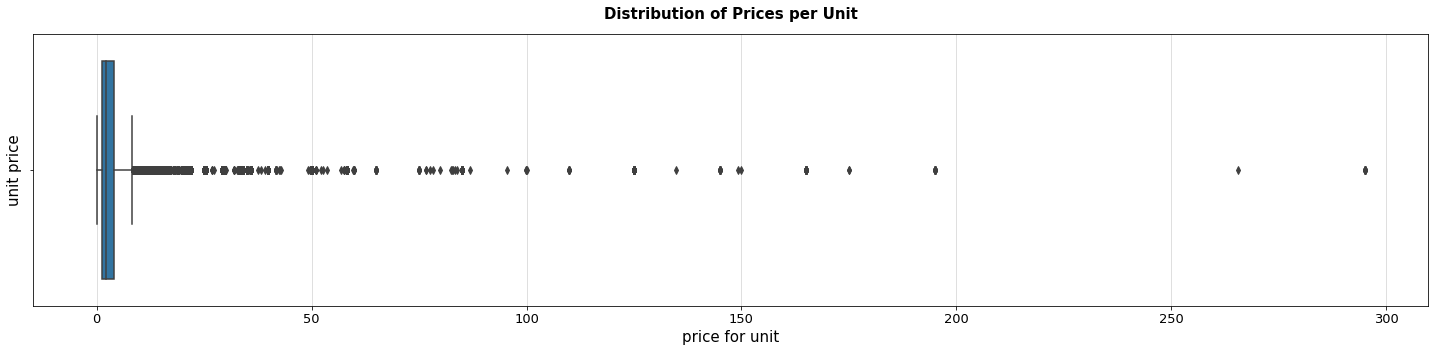

In [91]:
plt.figure(figsize=(25,5))
sns.boxplot(x=data['unitprice'])

plt.title("Distribution of Prices per Unit", fontsize=15, fontweight="bold", pad=15)
ticks = np.arange(0, 350, 50)
plt.xticks(ticks, fontsize=13)
plt.xlabel('price for unit', fontsize=15)
plt.ylabel("unit price", fontsize=15)
plt.grid(axis='x',alpha=0.5)
plt.show()

- The majority of products are priced between 0 to 100.
- Most products are priced below 50
- Most explensive products are 22655(VINTAGE RED KITCHEN CABINET) and 22656(VINTAGE BLUE KITCHEN CABINET) 

In [92]:
print(data[data['unitprice']>100]['stockcode'].unique())


['22827' '22655' '22828' '22826' '22656' '22823' 'C2' 'BANK CHARGES']


In [93]:
data[data['stockcode']=='C2']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
1423,536540,C2,CARRIAGE,1,2018-11-29 14:05:00,50.0,14911.0,50.0,2018-11-29,2018-11
12119,537368,C2,CARRIAGE,1,2018-12-04 12:40:00,50.0,14911.0,50.0,2018-12-04,2018-12
12452,537378,C2,CARRIAGE,1,2018-12-04 13:06:00,50.0,14911.0,50.0,2018-12-04,2018-12
19975,537963,C2,CARRIAGE,1,2018-12-07 11:30:00,50.0,13369.0,50.0,2018-12-07,2018-12
20016,538002,C2,CARRIAGE,1,2018-12-07 11:48:00,50.0,14932.0,50.0,2018-12-07,2018-12
...,...,...,...,...,...,...,...,...,...,...
515000,579768,C2,CARRIAGE,1,2019-11-28 15:08:00,50.0,14911.0,50.0,2019-11-28,2019-11
516484,579910,C2,CARRIAGE,1,2019-11-29 08:52:00,50.0,14911.0,50.0,2019-11-29,2019-11
518854,580124,C2,CARRIAGE,1,2019-11-29 17:12:00,50.0,nan,50.0,2019-11-29,2019-11
518905,580127,C2,CARRIAGE,1,2019-11-29 17:51:00,50.0,14911.0,50.0,2019-11-29,2019-11


In [94]:
data[data['stockcode']=='BANK CHARGES']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month
4406,536779,BANK CHARGES,Bank Charges,1,2018-11-30 15:08:00,15.000000,15823.0,15.000000,2018-11-30,2018-11
14435,C537572,BANK CHARGES,Bank Charges,-1,2018-12-05 12:00:00,95.379997,nan,-95.379997,2018-12-05,2018-12
62508,541505,BANK CHARGES,Bank Charges,1,2019-01-16 15:58:00,15.000000,15939.0,15.000000,2019-01-16,2019-01
96675,C544575,BANK CHARGES,Bank Charges,-1,2019-02-19 13:58:00,134.759995,nan,-134.759995,2019-02-19,2019-02
96676,C544576,BANK CHARGES,Bank Charges,-1,2019-02-19 14:01:00,149.160004,nan,-149.160004,2019-02-19,2019-02
96715,C544584,BANK CHARGES,Bank Charges,-1,2019-02-19 14:52:00,109.839996,nan,-109.839996,2019-02-19,2019-02
124025,C546943,BANK CHARGES,Bank Charges,-1,2019-03-16 11:11:00,56.930000,nan,-56.930000,2019-03-16,2019-03
152966,549717,BANK CHARGES,Bank Charges,1,2019-04-09 14:56:00,15.000000,14606.0,15.000000,2019-04-09,2019-04
175275,551945,BANK CHARGES,Bank Charges,1,2019-05-03 11:09:00,15.000000,16714.0,15.000000,2019-05-03,2019-05
193136,C553511,BANK CHARGES,Bank Charges,-1,2019-05-15 13:49:00,86.900002,nan,-86.900002,2019-05-15,2019-05


In [95]:
data = data[data.stockcode !="C"]
data = data[data.stockcode !='BANK CHARGES']
data = data[data.description !='CHECK']

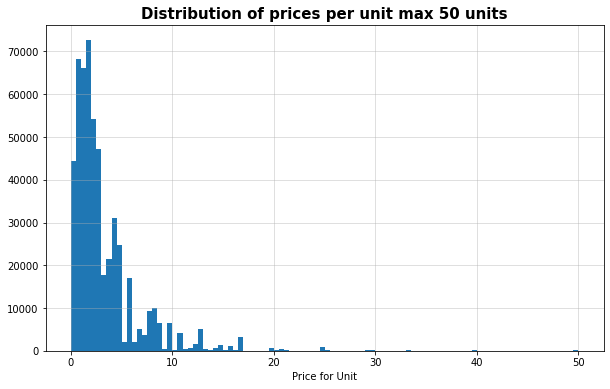

In [96]:
plt.figure(figsize=(10,6))
plt.hist(data['unitprice'], bins=100,range=(0, 50))

plt.title('Distribution of prices per unit max 50 units', fontsize=15, fontweight="bold")
plt.xlabel('Price for Unit')
plt.grid(alpha=.5)
plt.show()

In [97]:
data.stockcode.nunique()

3937

In [98]:
print('Number of unique products:',data.stockcode.nunique())
print('Products that are priced above 50:',data[data['unitprice']>50]['stockcode'].nunique())
print('Products that are priced 50 or less:', data[data['unitprice']<=50]['stockcode'].nunique())
print('Products that are priced 10 or less:', data[data['unitprice']<=10]['stockcode'].nunique())
print('Products that are less than 1 and above 0:',data[(data['unitprice']<1)&(data['unitprice']!=0)]['stockcode'].nunique())
print('Products that priced 0:',data[data['unitprice']==0]['stockcode'].nunique())

Number of unique products: 3937
Products that are priced above 50: 24
Products that are priced 50 or less: 3931
Products that are priced 10 or less: 3837
Products that are less than 1 and above 0: 1301
Products that priced 0: 1069


- Only 24 products are above 50.
- Only 7 products are priced above 100, and only 2 are proced above 200:

2 products that are priced above 200

VINTAGE RED KITCHEN CABINET
VINTAGE BLUE KITCHEN CABINET

4 products are priced above 100 but less than 200

RUSTIC SEVENTEEN DRAWER SIDEBOARD
REGENCY MIRROR WITH SHUTTERS
LOVE SEAT ANTIQUE WHITE METAL
CHEST NATURAL WOOD 20 DRAWERS

- Mostly all of the products are priced 50 or less, 3931 out of 3937.
- 1070 products are priced 0. 
- 1301 products are priced between 1 and 0

**price range categories**

In [99]:
print("25% price range:",np.percentile(data['unitprice'], 25))
print("50% price range:",np.percentile(data['unitprice'], 50))
print("75% price range:",np.percentile(data['unitprice'], 75))
print("95% price range:",np.percentile(data['unitprice'], 95))

25% price range: 1.25
50% price range: 2.0799999237060547
75% price range: 4.130000114440918
95% price range: 9.949999809265137


In [100]:
def price_range(i):
    if i ==0:
        return 'free'
    elif 0 < i <= 1.25:
        return 'cheap'
    elif 1.25 < i <= 2.07:
        return 'medium'
    elif 2.07 < i <= 4.13:
        return 'high medium'
    elif 4.13 < i <= 9.94:
        return 'high'
    return 'elite'

In [101]:
data['price_range'] = data['unitprice'].apply(price_range)
data['price_range'].value_counts()

cheap          162405
high medium    140600
high           111963
medium          87130
elite           29025
free             1882
Name: price_range, dtype: int64

**summary**

- 1885 purchases are basically free of charge, price 0. 
- 162405 purchases are concidred cheap, not more than 1.25. 
- 87130 purchases are medium priced, more than 1.25 but less than 2.07.
- 140600 purchases are high priced, more tha n 2.07 and less than 4.13.
- 111961 puchases are at top price, more than 4.13 and less than 9.94.
- 29025 of the puchases were the top 5% of the data, tagged as elite and more expansive than 9.94.


--------------------------

**quantity distribution**

In [102]:
data.quantity.describe()

count    533005.000000
mean          9.812548
std          48.960211
min       -9360.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       12540.000000
Name: quantity, dtype: float64

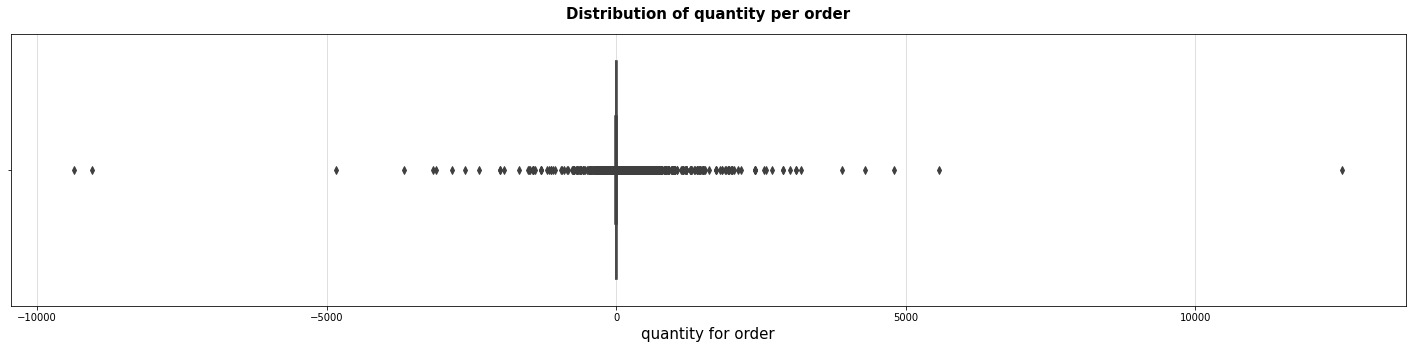

In [103]:
plt.figure(figsize=(25,5))
sns.boxplot(x=data['quantity'])
plt.title("Distribution of quantity per order", fontsize=15, fontweight="bold", pad=15)
plt.xlabel('quantity for order', fontsize=15)
plt.grid(axis='x',alpha=0.5)
plt.show()

In [104]:
print("25% order quantity:",np.percentile(data['quantity'], 25))
print("50% order quantity:",np.percentile(data['quantity'], 50))
print("75% order quantity:",np.percentile(data['quantity'], 75))
print("90% order quantity:",np.percentile(data['quantity'], 90))
print("99% order quantity:",np.percentile(data['quantity'], 99))

25% order quantity: 1.0
50% order quantity: 3.0
75% order quantity: 10.0
90% order quantity: 24.0
99% order quantity: 100.0


In [105]:
data[(data['quantity']>4000)|(data['quantity']<-4000)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month,price_range
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2018-11-30 14:23:00,0.03,15838.0,-280.799988,2018-11-30,2018-11,cheap
74614,542504,37413,ICON MUG REVOLUTIONARY,5568,2019-01-26 12:03:00,0.00,nan,0.000000,2019-01-26,2019-01,free
206121,554868,22197,SMALL POPCORN HOLDER,4300,2019-05-25 10:52:00,0.72,13135.0,3096.000244,2019-05-25,2019-05,cheap
225528,556687,23003,Printing smudges/thrown away,-9058,2019-06-12 10:36:00,0.00,nan,-0.000000,2019-06-12,2019-06,free
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.21,12901.0,1007.999939,2019-10-25,2019-10,cheap
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2019-10-29 15:17:00,0.00,nan,-0.000000,2019-10-29,2019-10,free
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2019-11-23 15:57:00,0.00,13256.0,0.000000,2019-11-23,2019-11,free


it seems that most of these outliers dont have a price. we can remove the technical, free price_range rows and this one cancellation that skews the data. 

In [106]:
data = data[data.invoiceno !="556687"]
data = data[data.invoiceno !="573596"]
data = data[data.invoiceno !="542504"]
data = data[data.invoiceno !="578841"]
data = data[data.invoiceno !="C536757"]

In [107]:
data[data['price_range']=='free']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month,price_range
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2018-11-29 11:52:00,0.0,nan,0.0,2018-11-29,2018-11,free
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2018-11-29 14:33:00,0.0,nan,0.0,2018-11-29,2018-11,free
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2018-11-29 14:33:00,0.0,nan,0.0,2018-11-29,2018-11,free
2025,536553,37461,FUNKY MONKEY MUG,3,2018-11-29 14:35:00,0.0,nan,0.0,2018-11-29,2018-11,free
2406,536589,21777,RECIPE BOX WITH METAL HEART,-10,2018-11-29 16:50:00,0.0,nan,-0.0,2018-11-29,2018-11,free
...,...,...,...,...,...,...,...,...,...,...,...
535332,581209,21620,SET OF 4 ROSE BOTANICAL CANDLES,6,2019-12-05 18:35:00,0.0,nan,0.0,2019-12-05,2019-12,free
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2019-12-06 10:33:00,0.0,nan,0.0,2019-12-06,2019-12,free
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2019-12-06 13:58:00,0.0,nan,0.0,2019-12-06,2019-12,free
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2019-12-06 13:58:00,0.0,nan,0.0,2019-12-06,2019-12,free


Majority of these rows dont have customerid value.

In [108]:
data[data['price_range']=='free']['customerid'].value_counts()

nan        1845
13081.0       4
14646.0       4
14911.0       2
12415.0       2
13985.0       2
15107.0       1
12444.0       1
12507.0       1
13014.0       1
15804.0       1
13239.0       1
16818.0       1
16560.0       1
12457.0       1
18059.0       1
17560.0       1
12431.0       1
16133.0       1
12647.0       1
17667.0       1
14410.0       1
13113.0       1
14110.0       1
15602.0       1
Name: customerid, dtype: int64

only 33 of thesse values have a customerid value, all other 1848 rows have NaN value.
This is a small percentage from the data that doesnt offer much information so us since we cant trace this orders its betterto remove the from the data  

In [109]:
# Deleting zero price orders with no customer id
print(data.shape)
data=data[~((data['unitprice']== 0)&(data['customerid'].isnull()))]

(533000, 11)


In [110]:
print(data.shape)
print('free items:',len(data[data['price_range']=='free']))

(533000, 11)
free items: 1878


Now lets analyze cancellations and orders seperately 

In [111]:
cancel=data[data.invoiceno.str.startswith('C')]
order=data[~(data.invoiceno.str.startswith('C'))]
order=data[data['quantity']>0]

In [112]:
print('data:',data.shape)
print('Cancel:',cancel.shape)
print('Order:',order.shape)

data: (533000, 11)
Cancel: (8662, 11)
Order: (523472, 11)


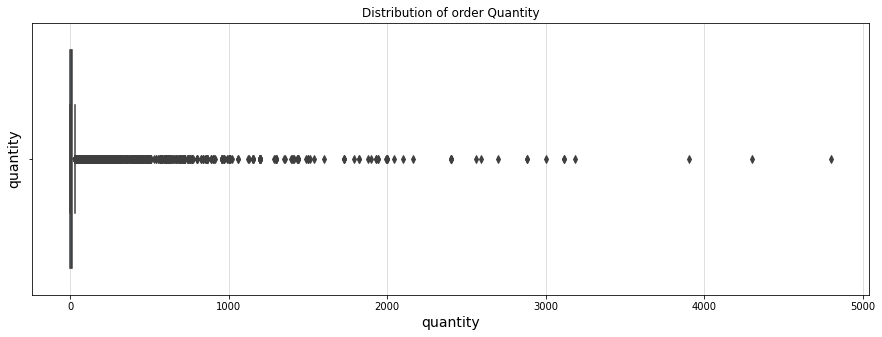

In [113]:
plt.figure(figsize=(15,5))
sns.boxplot(x=order['quantity'])
plt.title('Distribution of order Quantity')
plt.xlabel('quantity', fontsize=14)
plt.ylabel("quantity", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

In [114]:
print("25% order quantity:",np.percentile(order['quantity'], 25))
print("50% order quantity:",np.percentile(order['quantity'], 50))
print("75% order quantity:",np.percentile(order['quantity'], 75))
print("90% order quantity:",np.percentile(data['quantity'], 90))
print("99% order quantity:",np.percentile(data['quantity'], 99))

25% order quantity: 1.0
50% order quantity: 4.0
75% order quantity: 12.0
90% order quantity: 24.0
99% order quantity: 100.0


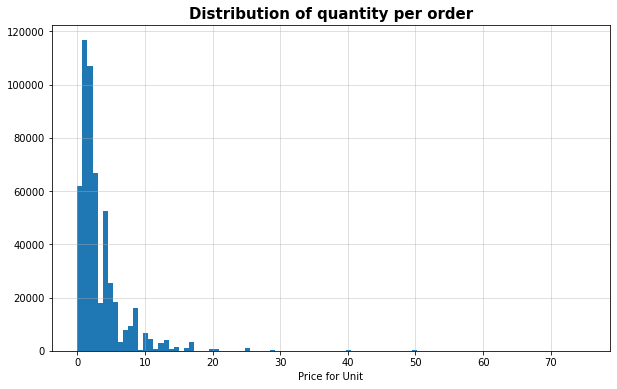

In [115]:
plt.figure(figsize=(10,6))
plt.hist(data['unitprice'], bins=100,range=(0, 75))

plt.title('Distribution of quantity per order', fontsize=15, fontweight="bold")
plt.xlabel('Price for Unit')
plt.grid(alpha=.5)
plt.show()

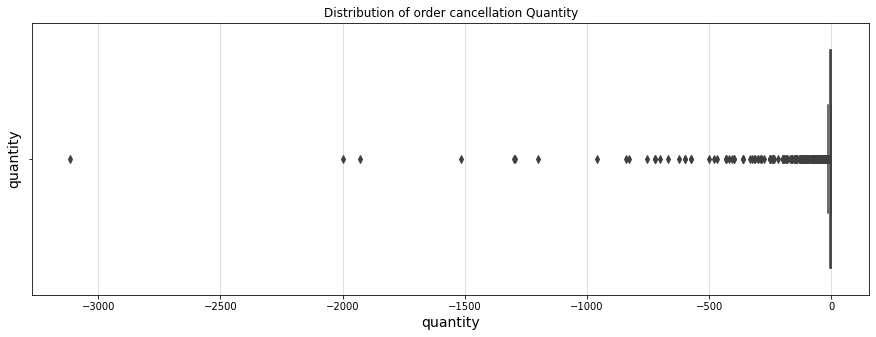

In [116]:
plt.figure(figsize=(15,5))
sns.boxplot(x=cancel['quantity'])
plt.title('Distribution of order cancellation Quantity')
plt.xlabel('quantity', fontsize=14)
plt.ylabel("quantity", fontsize=14)
plt.grid(axis='x',alpha=0.5)
plt.show()

In [117]:
print("1st percentile of order quantity:",np.percentile(cancel['quantity'], 10))
print("5st percentile of order quantity:",np.percentile(cancel['quantity'], 5))
print("10st percentile of order quantity:",np.percentile(cancel['quantity'], 1))

1st percentile of order quantity: -20.0
5st percentile of order quantity: -36.0
10st percentile of order quantity: -160.78


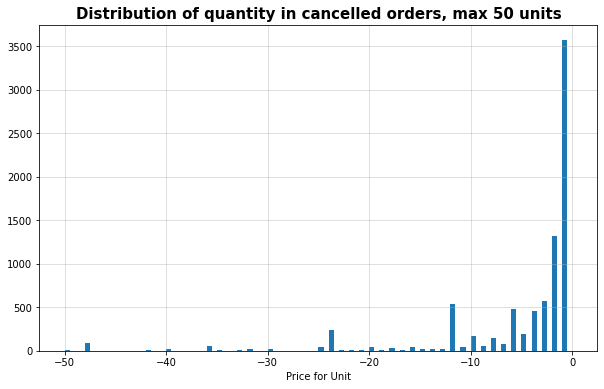

In [118]:
plt.figure(figsize=(10,6))
plt.hist(cancel['quantity'], bins=100,range=(-50,0))

plt.title('Distribution of quantity in cancelled orders, max 50 units', fontsize=15, fontweight="bold")
plt.xlabel('Price for Unit')
plt.grid(alpha=.5)
plt.show()

**summary**

- 90% of orders had less than 24 products per order,and more than 50% of orders have 2-3 products.
- 95% of order cncellations had less than 36 products per order, and more than 50% of orders cancellations had 1-2 products.
- nearly all  order and cancellation range lays between 100 products per order and 180 products per cacellation
--------------------

**products categories**

In [119]:
# Checking most frequently used words
Lem = WordNetLemmatizer()
queries = data['description'].unique()

# Descriptions into words:
splitwords = [nltk.word_tokenize(str(query)) for query in queries]

# Converting nested list to a list:
word_list = []
for sublist in splitwords:
    for item in sublist:
        word_list.append(item)

# Lemmanization
lemmas = [Lem.lemmatize(w, pos = 'n') for w in word_list]

#Counting how many words we have
counter = Counter(lemmas)

# Checking those, that were used more than once
[w for w in word_list if counter[w] > 2][:10]

['WHITE',
 'HANGING',
 'HEART',
 'T-LIGHT',
 'HOLDER',
 'WHITE',
 'METAL',
 'LANTERN',
 'CREAM',
 'CUPID']

In [120]:
matches = []
for query in queries:
     if 'HEART' in query and query not in matches:
            matches.append(query) 
matches.sort()
matches[:100]

['3 BLACK CATS W HEARTS BLANK CARD',
 '3 HEARTS HANGING DECORATION RUSTIC',
 '3 TIER SWEETHEART GARDEN SHELF',
 '36 FOIL HEART CAKE CASES',
 '3D HEARTS  HONEYCOMB PAPER GARLAND',
 '6 CHOCOLATE LOVE HEART T-LIGHTS',
 '72 SWEETHEART FAIRY CAKE CASES',
 'ALPHABET HEARTS STICKER SHEET',
 'ALUMINIUM HEART',
 'ALUMINIUM STAMPED HEART',
 'ANT WHITE WIRE HEART SPIRAL',
 'ANTIQUE GLASS HEART DECORATION ',
 'ANTIQUE HEART SHELF UNIT',
 'ASSORTED TUTTI FRUTTI HEART BOX',
 'BAKING MOULD HEART MILK CHOCOLATE',
 'BAKING MOULD HEART WHITE CHOCOLATE',
 'BATHROOM SET LOVE HEART DESIGN',
 'BEADED CRYSTAL HEART BLUE  LARGE',
 'BEADED CRYSTAL HEART BLUE ON STICK',
 'BEADED CRYSTAL HEART BLUE SMALL',
 'BEADED CRYSTAL HEART GREEN LARGE',
 'BEADED CRYSTAL HEART GREEN ON STICK',
 'BEADED CRYSTAL HEART GREEN SMALL',
 'BEADED CRYSTAL HEART PINK LARGE',
 'BEADED CRYSTAL HEART PINK ON STICK',
 'BEADED CRYSTAL HEART PINK SMALL',
 'BEADED LOVE HEART JEWELLERY SET',
 'BEADED PEARL HEART WHITE LARGE',
 'BEADED PEARL 

In [121]:
# Garden
garden_depot=['GARDEN', 'HERB','PLANT','GNOME','GLOVES']

# Kitchen and Dining
kitchen_depot=['BOARD','KITCHEN','CAKESTAND','CAKE','BAKING','JAR','PLATE','DISH','BOTTLE','CERAMIC','BOWL','NAPKIN',
         'FOOD','OVEN','SPOON','LADLE','POT','PAN','CUP','SPOONS','RECIPE','DISH','FRUITBOWL',
         'MUG','TEA','CUTLERY','TRAY','LUNCH','TINS','DINNER','DISH','DINER','PICNIC','FRUIT','CAKES',
         'BREAKFAST','NAPKINS','BISCUIT','MOULD','COASTER','SAUCER','CONTAINER','PORCELAIN','COOKIE','PIZZA',
         'TOAST','CUTTERS','BOWLS','SALAD','FORK','TEAPOT','SPOONS','CUPCAKE','CHOPSTICKS','MICROWAVE',
         'COOKING','SQUEEZER','PLACEMAT']

# Accessories
accessories=['LAVENDER','TRADITIONAL','EDWARDIAN','SIGN','ORNAMENT','WARMER','NECKLACE', 'NECKL', 'BAG', 'CHARMS', 'CHARM','EARRINGS', 'JEWELLERY', 'BEADED', 
             'PURSE', 'BRACELET', 'POCKET','HAIR', 'PATCHES','HANDBAG','LUGGAGE','CHAIN','COMB',
             'SUNGLASSES','PASSPORT','KEY','KEYRING','RING','SCARF','PENCILS','TRAVEL','PHONE','WALLET',
             'TOTE','BROOCH','COSMETIC','NECKLACE+BRACELET','BACKPACK','HAIRBAND','LIPSTICK','CARDHOLDER',
             'HEADPHONES','UMBRELLA','PENCIL','HAT']

# Home and Living
home_depot=['DRAWER','CANDLE','CANDLESTICK','CANDLEHOLDER','T-LIGHT','FRAME','DOORSTOP','DOORBELL','DOORMAT',
      'HOLDER','BOOK','NOTEBOOK','HOOK','ORGANISER','HANGER','CHALKBOARD','BUCKET','ART','BASKET','RACK',
      'WIRE','VASE','LANTERN','CLOCK','CUSHION','HOME','STORAGE','DOOR','KNOB','BOXES','LIGHT','LAMP','SOAP',
      'CURTAIN','BOX','ALARM','TOWELS','BATH','DOORKNOB','LAUNDRY','SHOWER','BANK','TOWEL','COAT','CHEST',
      'SHELF','CABINET','TABLE','DRAWERS','SEAT','MIRROR']

# Kids
kids_depot=['JIGSAW','PLAYHOUSE','CHILDRENS','CHILDREN','KIDS','CHILDHOOD','NURSERY','TOY','CHILDS','DINOSAUR','DOLL','BABY','TEDDY',
      'BOYS','SCHOOL','SHARK']

In [122]:
def product_category(description):
    
    # Garden
    for w in garden_depot:
        if w in description:
            return 'garden'
    
    # Christmas
    if 'CHRISTMAS' in description:
        return 'Christmas'
    
    # Vintage
    if 'VINTAGE' in description:
        return 'Vintage'
    
    # Kids
    for w in kids_depot:
        if w in description:
            return 'kids_depot'
        
    # Accessories
    for w in accessories:
        if w in description:
            return 'accessories'
        
    # Kitchen and Dining
    for w in kitchen_depot:
        if w in description:
            return 'kitchen_depot'
        
    # Home and Living
    for w in home_depot:
        if w in description:
            return 'home_depot'
    
    # decorations, crafts and everything that doesnt fit other categories
    return 'misc'

In [123]:
data['product_category'] = data['description'].apply(product_category)
order['product_category'] = order['description'].apply(product_category)

#To check if I covered all of the items:
print(len(data['description']))
print(len(data['product_category']))
print()
print(data['product_category'].value_counts())

533000
533000

kitchen_depot    127831
accessories      122455
home_depot       113991
misc              74972
kids_depot        29054
Vintage           27184
Christmas         24954
garden            12559
Name: product_category, dtype: int64


In [124]:
data[data['product_category']=='misc']['description'].unique()

array(['LOVE BUILDING BLOCK WORD', 'STARS GIFT TAPE ',
       'CHARLIE & LOLA WASTEPAPER BIN FLORA', 'JAM MAKING SET PRINTED',
       'GIRLY PINK TOOL SET', 'PHOTO CLIP LINE', 'FELT EGG COSY CHICKEN',
       'FELT EGG COSY WHITE RABBIT ', 'SET OF 6 FUNKY BEAKERS',
       'GLASS CLOCHE SMALL', 'CHOCOLATE CALCULATOR',
       'SET OF 3 COLOURED  FLYING DUCKS', 'ENAMEL FLOWER JUG CREAM',
       'ENAMEL BREAD BIN CREAM', 'FRIDGE MAGNETS LES ENFANTS ASSORTED',
       'SET OF 3 GOLD FLYING DUCKS', 'DELUXE SEWING KIT ', 'PHOTO CUBE',
       'PLASTERS IN TIN CIRCUS PARADE ',
       'PACK OF 12 PINK PAISLEY TISSUES ',
       'PACK OF 12 BLUE PAISLEY TISSUES ', 'PLASTERS IN TIN SKULLS',
       '3 STRIPEY MICE FELTCRAFT', 'SET OF 6 SOLDIER SKITTLES',
       'STAR DECORATION PAINTED ZINC ', 'FANCY FONT BIRTHDAY CARD, ',
       'IVORY EMBROIDERED QUILT ', 'SET OF 3 BLACK FLYING DUCKS',
       'PICTURE DOMINOES', 'S/6 SEW ON CROCHET FLOWERS',
       'SCANDINAVIAN REDS RIBBONS', 'BALLOONS  WRITING SET

In [125]:
data

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month,price_range,product_category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.299999,2018-11-29,2018-11,high medium,home_depot
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.340000,2018-11-29,2018-11,high medium,home_depot
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.000000,2018-11-29,2018-11,high medium,kitchen_depot
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.340000,2018-11-29,2018-11,high medium,kitchen_depot
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.340000,2018-11-29,2018-11,high medium,home_depot
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,10.200001,2019-12-07,2019-12,cheap,kitchen_depot
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,12.599999,2019-12-07,2019-12,high medium,kids_depot
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,16.600000,2019-12-07,2019-12,high,kids_depot
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,16.600000,2019-12-07,2019-12,high,kids_depot


In [126]:
data.stb.freq(['product_category'])

,product_category,count,percent,cumulative_count,cumulative_percent
0,kitchen_depot,127831,23.983302,127831,23.983302
1,accessories,122455,22.974672,250286,46.957974
2,home_depot,113991,21.386679,364277,68.344653
3,misc,74972,14.066041,439249,82.410694
4,kids_depot,29054,5.451032,468303,87.861726
5,Vintage,27184,5.100188,495487,92.961914
6,Christmas,24954,4.681801,520441,97.643715
7,garden,12559,2.356285,533000,100.000000


**Summary**

- 533000 rows - devided into 8 categories
- largest categories are accessories, kitchen depot and house depot.

kitchen_depot with 127831, 24%

accessories with 122455, 22%

home_depot with 113991, 21%

misc with 74972, 14%

kids_depot with 29054, 5%

Vintage with 27184, 5%

Christmas with 24954, 4%

darden with 12559, 2%

Now after we categorized the data into product categories we can plot for the most ordered products and categories.

------------------------

**Most ordered products**

In [127]:
cancel=data[data.invoiceno.str.startswith('C')]
order=data[~(data.invoiceno.str.startswith('C'))]
print('Total:',data.shape)
print('Cancellations:',cancel.shape)
print('Orders:',order.shape)

Total: (533000, 12)
Cancellations: (8662, 12)
Orders: (524338, 12)


In [128]:
# Checking each product's total amount
top_items=(order.groupby(['description'])['quantity'].count().reset_index().sort_values(by='quantity', ascending=False))
print('total items:', len(top_items))
print('Items, that were ordered 1000 times or more:',len(top_items[top_items['quantity']>=1000]))
print('Items, that were ordered more than 500 times:',len(top_items[(top_items['quantity']>500)&(top_items['quantity']<1000)]))
print('Items, that were ordered twice:', len(top_items[top_items['quantity']==2]))
print('Items, that were ordered once:', len(top_items[top_items['quantity']==1]))

total items: 4072
Items, that were ordered 1000 times or more: 34
Items, that were ordered more than 500 times: 154
Items, that were ordered twice: 141
Items, that were ordered once: 163


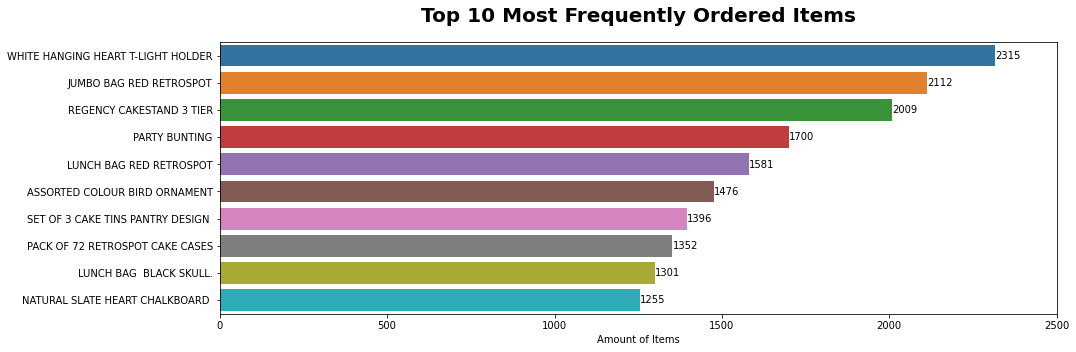

In [129]:
# Prepare Data
items_10=order['description'].value_counts().head(10).reset_index()

# Plot a graph
plt.figure(figsize=(15,5))

sns.barplot(x='description',y='index', data=items_10)

for i, v in enumerate(items_10.description):
    plt.text(v+0.2, i, str(round(v)), color='black', va="center")

plt.title("Top 10 Most Frequently Ordered Items",fontsize=20,fontweight="bold", pad=20)
plt.ylabel('Item Name')
plt.xlabel('Amount of Items')
plt.ylabel(None)
plt.xlim(0,2500)
plt.show()

Top 10 the most frequently ordered items:

- WHITE HANGING HEART T-LIGHT HOLDER, 2315
- JUMBO BAG RED RETROSPOT, 2112
- REGENCY CAKESTAND 3 TIER, 2009
- PARTY BUNTING, 1700
- LUNCH BAG RED RETROSPOT, 1581
- ASSORTED COLOUR BIRD ORNAMENT, 1476
- SET OF 3 CAKE TINS PANTRY DESIGN, 1396
- PACK OF 72 RETROSPOT CAKE CASES, 1352
- LUNCH BAG BLACK SKULL, 1301
- NATURAL SLATE HEART CHALKBOARD, 1255

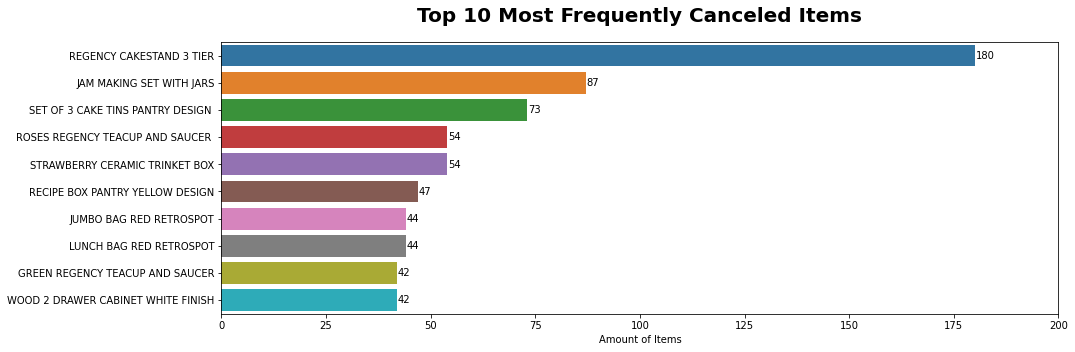

In [130]:
# Prepare Data
items_10=cancel['description'].value_counts().head(10).reset_index()

# Plot a graph
plt.figure(figsize=(15,5))

sns.barplot(x='description',y='index', data=items_10)

for i, v in enumerate(items_10.description):
    plt.text(v+0.2, i, str(round(v)), color='black', va="center")

plt.title("Top 10 Most Frequently Canceled Items",fontsize=20,fontweight="bold", pad=20)
plt.ylabel('Item Name')
plt.xlabel('Amount of Items')
plt.ylabel(None)
plt.xlim(0,200)
plt.show()

Top-5 most frequently canceled items

- REGENCY CAKESTAND 3 TIER 180
- JAM MAKING SET WITH JARS 87
- SET OF 3 CAKE TINS PANTRY DESIGN 73
- STRAWBERRY CERAMIC TRINKET BOX 54
- ROSES REGENCY TEACUP AND SAUCER 54

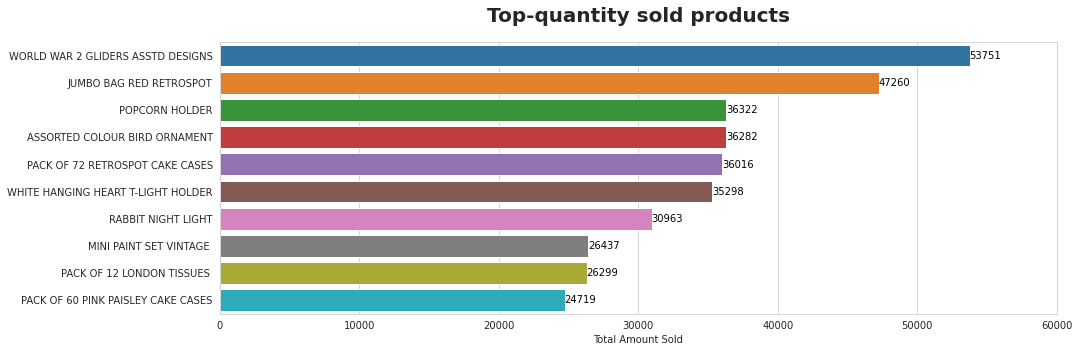

In [131]:
# Prepare Data
top_quantity_items=(data.groupby(['description'])
           ['quantity'].sum().reset_index()
           .sort_values(by='quantity', ascending=False).head(10))

sns.set_style("whitegrid")

# Plot a graph
plt.figure(figsize=(15,5))

sns.barplot(x='quantity',y='description', data=top_quantity_items)

for i, v in enumerate(top_quantity_items.quantity):
    plt.text(v+1.3, i, str(round(v)), color='black', va="center")

plt.title("Top-quantity sold products",fontsize=20,fontweight="bold", pad=20)
#plt.ylabel('Category')
plt.xlabel('Total Amount Sold')
plt.ylabel(None)
#sns.despine(left=True)
plt.xlim(0,60000)
plt.show()

Top-5 products with most quantity sold

- WORLD WAR 2 GLIDERS ASSTD DESIGNS, 53751
- JUMBO BAG RED RETROSPOT, 4720
- POPCORN HOLDER, 36322
- ASSORTED COLOUR BIRD ORNAMENT, 36282
- PACK OF 72 RETROSPOT CAKE CASES, 36016 

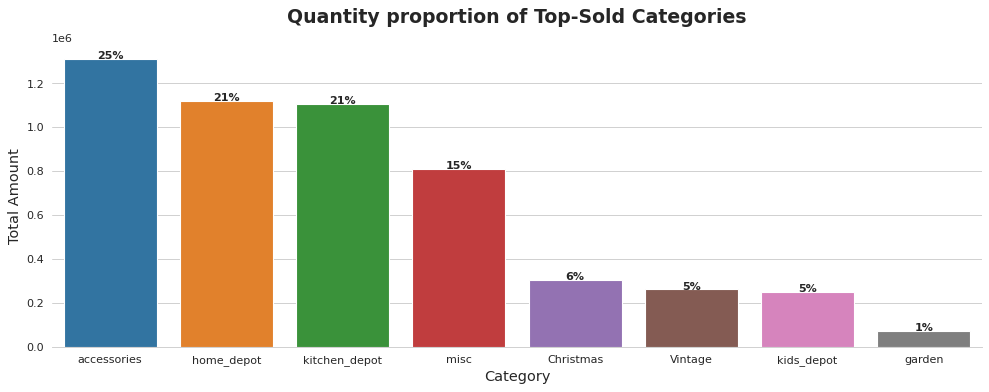

In [132]:
# Prepare data
top_quantity_cat=(data.groupby(['product_category'])
           ['quantity'].sum().reset_index()
           .sort_values(by='quantity', ascending=False))



total = float(top_quantity_cat['quantity'].sum())

# Plot
plt.figure(figsize=(15,5), dpi= 80)
ax = sns.barplot(x='product_category',y='quantity', data=top_quantity_cat)
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    ax.text(p.get_x()+p.get_width()/2., height+1050, '{:.0%}'.format(height/total), ha="center", fontweight="bold")

# Decorations

plt.title("Quantity proportion of Top-Sold Categories",fontsize=17,fontweight="bold", pad=20)
plt.ylabel('Total Amount', size=13)
plt.xlabel("Category", size=13)
sns.despine(left=True)
plt.show()

In [133]:
top_quantity_cat['quantity']

2    1308770
4    1118405
6    1106768
7     809595
0     305876
1     261443
5     251475
3      72945
Name: quantity, dtype: int32


----------------------

Top 5 cetegoris in terms of order quantity:

- Accessories 25%
- Kitchen_depot 21% 
- Home_depot 21%
- Misc 15%
- Chrismas 6%
- Vinatge 5%
- Kids_depot 5%
- Garden 1%

----------------------------

**Holiday season and rest of the year**

In [134]:
data['invoicemonth'] = data['invoicedate'].dt.month

In [135]:
holidayset=data[data['invoicemonth'].isin([9,10,11,12])]
offholidayset=data[data['invoicemonth'].isin([1,2,3,4,5,6,7,8])]

# Calculating amount of most ordered items in each category

def season_count(df):
    df=df.groupby(['product_category'])['invoiceno'].count().reset_index().sort_values(by='invoiceno', ascending=False).head(5)
    return df

holiday=season_count(holidayset)
offholiday=season_count(offholidayset)

def season_sum(df):
    df=df.groupby(['product_category'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(5)
    return df


holiday1=season_sum(holidayset)
offholiday1=season_sum(offholidayset)

def season_rev(df):
    df=df.groupby(['product_category'])['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False).head(5)
    return df

holiday2=season_rev(holidayset)
offholiday2=season_rev(offholidayset)


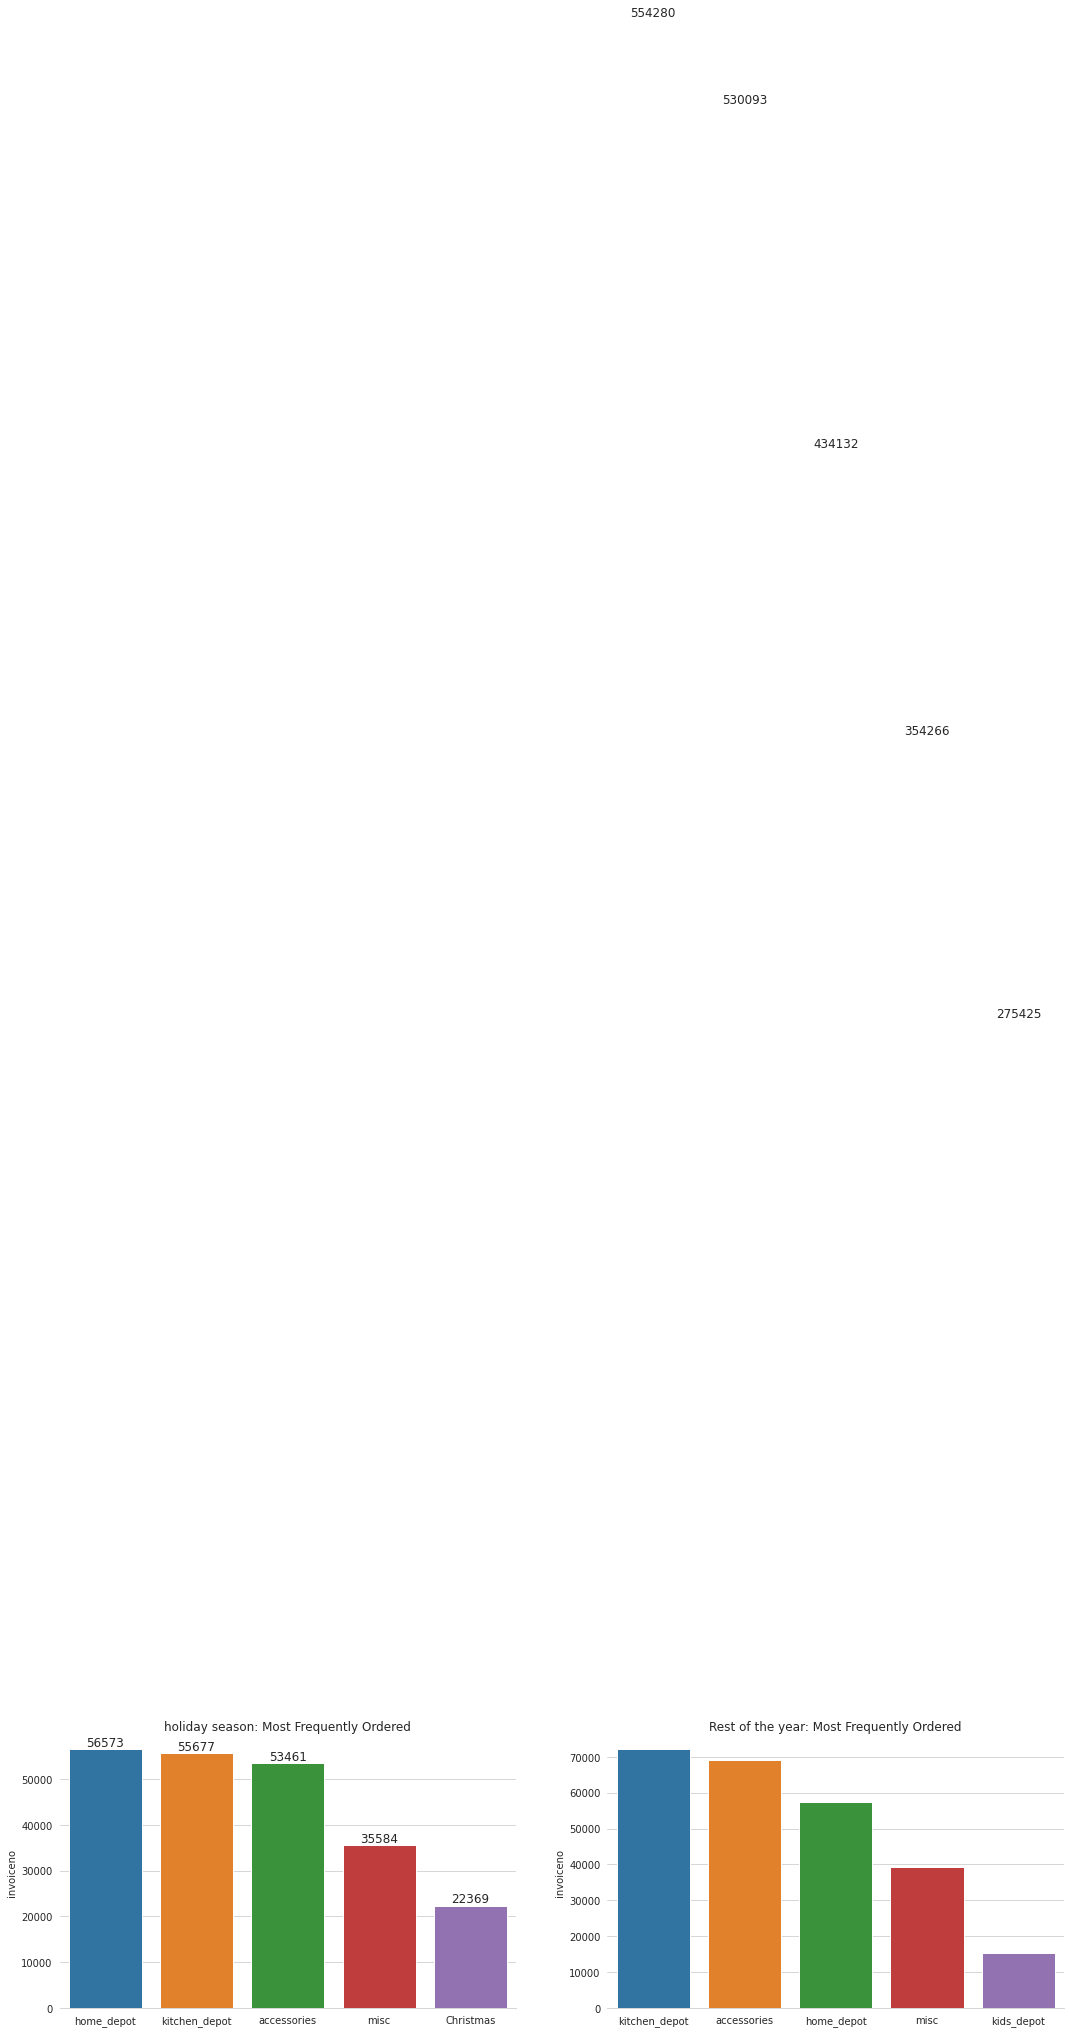

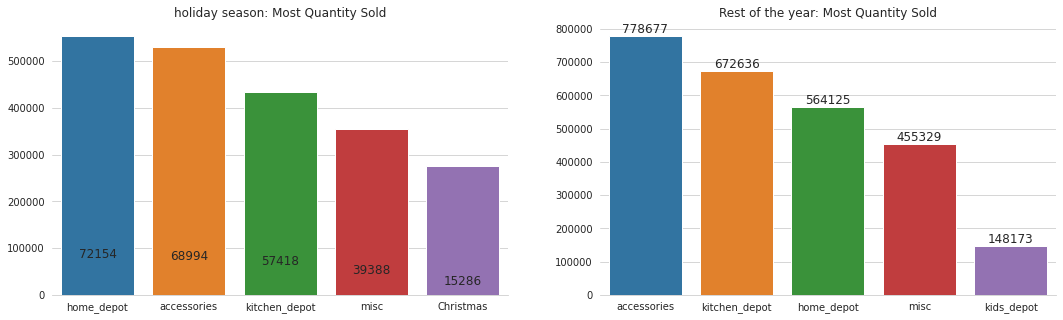

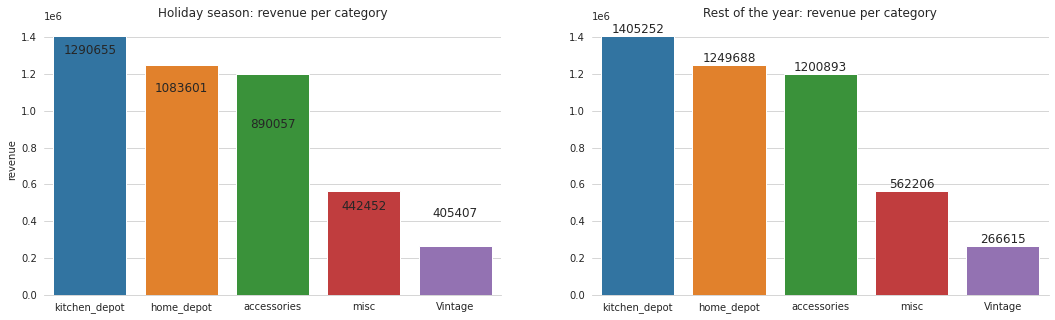

In [136]:
# Plot subplots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,5))
fig, (ax3,ax4) = plt.subplots(1, 2, figsize=(18,5))
fig, (ax5,ax6) = plt.subplots(1, 2, figsize=(18,5))


def annot(df,ax):
    for i, val in enumerate(df['invoiceno'].values):
        ax.text(i, val, int(val), horizontalalignment='center',verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

def annot1(df,ax):
    for i, val in enumerate(df['quantity'].values):
        ax.text(i, val, int(val), horizontalalignment='center',verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
        
def annot2(df,ax):
    for i, val in enumerate(df['revenue'].values):
        ax.text(i, val, int(val), horizontalalignment='center',verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
        
annot(holiday,ax1)
annot1(holiday1,ax2)
annot(offholiday,ax3)
annot1(offholiday1,ax4)
annot2(holiday2,ax5)
annot2(offholiday2,ax6)

# Create barplots
g1=sns.barplot(y='invoiceno', x='product_category', data=holiday, ax=ax1)
g1.set(title='holiday season: Most Frequently Ordered')
g1.set(xlabel=None)
sns.despine(left=True, ax=ax1)

g3=sns.barplot(y='invoiceno', x='product_category', data=offholiday, ax=ax2)
g3.set(title='Rest of the year: Most Frequently Ordered')
g3.set(xlabel=None)
sns.despine(left=True, ax=ax2)

g2=sns.barplot(y='quantity', x='product_category', data=holiday1, ax=ax3)
g2.set(title='holiday season: Most Quantity Sold')
g2.set(xlabel=None)
g2.set(ylabel=None)
sns.despine(left=True, ax=ax3)

g4=sns.barplot(y='quantity', x='product_category', data=offholiday1, ax=ax4)
g4.set(title='Rest of the year: Most Quantity Sold')
g4.set(xlabel=None)
g4.set(ylabel=None)
sns.despine(left=True, ax=ax4)

g5=sns.barplot(y='revenue', x='product_category', data=offholiday2, ax=ax5)
g5.set(title='Holiday season: revenue per category')
g5.set(xlabel=None)
sns.despine(left=True, ax=ax5)

g6=sns.barplot(y='revenue', x='product_category', data=offholiday2, ax=ax6)
g6.set(title='Rest of the year: revenue per category')
g6.set(xlabel=None)
g6.set(ylabel=None)
sns.despine(left=True, ax=ax6)

During holiday season there are more Home_depot purchases and higher revenue than in the rest of the year.

Chrismas category is increased to the top 5 ordered groups in both orders and product quantity but not in revenue.

During the rest of the year, Kitchen_depot category has the most orders and revenue and Accesories categorry has the largest product quantity per order. 

In [137]:
# Checking top ordered products in each season
def top_season_items(df):
    df=(df.groupby(['product_category','description']).agg({'stockcode':'count','quantity':'sum'}).reset_index()
           .sort_values(by='quantity', ascending=False))
    df.columns=['product_ategory', 'description', 'timesordered', 'quantity']
    display(df.head(5))

for df in (holidayset, offholidayset):
    top_season_items(df)

,product_ategory,description,timesordered,quantity
1926,home_depot,POPCORN HOLDER,607,27549
1931,home_depot,RABBIT NIGHT LIGHT,750,25940
1227,accessories,WORLD WAR 2 GLIDERS ASSTD DESIGNS,257,22528
96,Christmas,PAPER CHAIN KIT 50'S CHRISTMAS,1089,17638
747,accessories,JUMBO BAG RED RETROSPOT,841,17637


,product_ategory,description,timesordered,quantity
1193,accessories,WORLD WAR 2 GLIDERS ASSTD DESIGNS,284,31223
714,accessories,JUMBO BAG RED RETROSPOT,1315,29623
2654,kitchen_depot,PACK OF 72 RETROSPOT CAKE CASES,846,23868
2091,home_depot,WHITE HANGING HEART T-LIGHT HOLDER,1444,22339
358,accessories,ASSORTED COLOUR BIRD ORNAMENT,841,21714


in holiday season, most ordered products beloged to home_depot category
- POPCORN HOLDER
- RABBIT NIGHT LIGHT

Rest of the year  most ordered products beloged to accessories category
- WORLD WAR 2 GLIDERS ASSTD DESIGNS	
- JUMBO BAG RED RETROSPOT

---------------------------

**Categories by revenue**

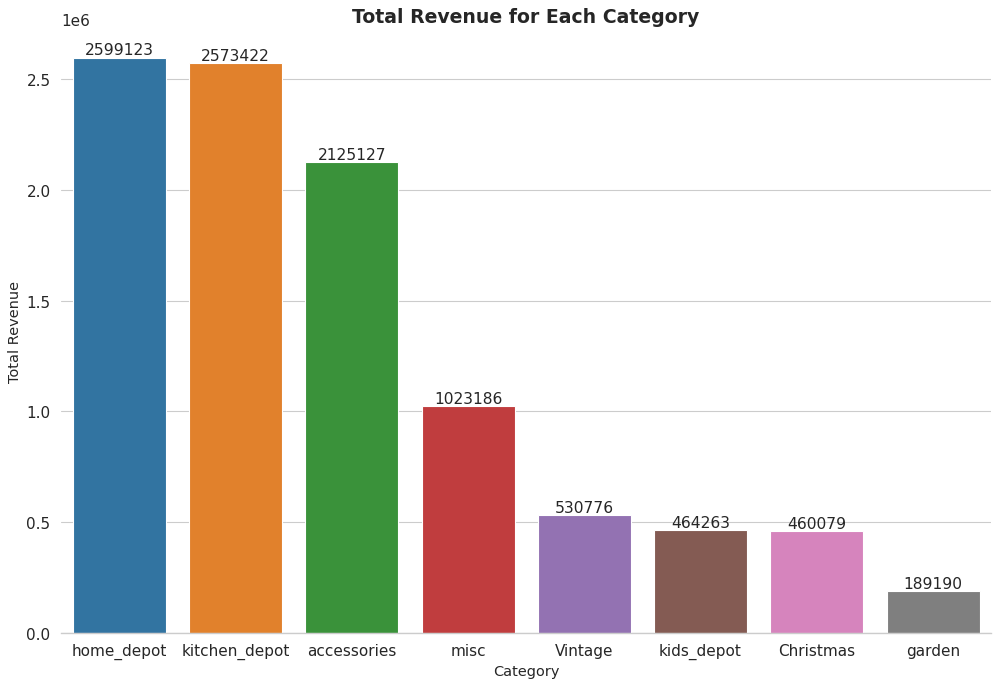

In [138]:
# Prepare data
cat_rev = order.groupby('product_category')['revenue'].sum().sort_values(ascending=False).reset_index()

sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.25)

# Plot Bars
plt.figure(figsize=(15,10), dpi= 80)

for i, val in enumerate(cat_rev['revenue'].values):
    plt.text(i, val, int(val), horizontalalignment='center', 
             verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

ax = sns.barplot(y='revenue', x='product_category', data=cat_rev)

#plt.gca().set_xticklabels(nin_gen['genre'], horizontalalignment= 'right', rotation=45)
plt.title("Total Revenue for Each Category",fontsize=17,fontweight="bold")
plt.ylabel('Total Revenue', size=13)
plt.xlabel("Category", size=13)
#plt.ylim(0,8000)
sns.despine(left=True)
plt.show()

- home_depot with 2599123

- kitchen_depot with 2573422

- accessories with 2125127

- misc with 1023186

- kids_depot with 530776

- Vintage with 464263

- Christmas with 460079

- garden with 189190

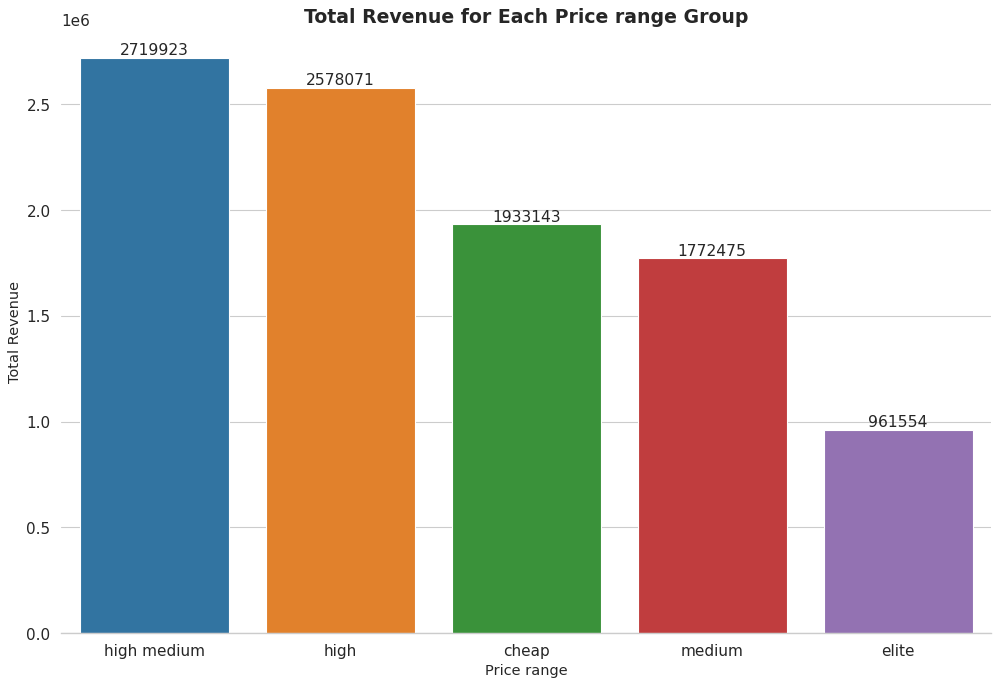

In [139]:
# Prepare data
gr_rev = order.groupby('price_range')['revenue'].sum().sort_values(ascending=False).reset_index()
gr_rev=gr_rev.drop(5)

sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.25)

# Plot Bars
plt.figure(figsize=(15,10), dpi= 80)

for i, val in enumerate(gr_rev['revenue'].values):
    plt.text(i, val, int(val), horizontalalignment='center', 
             verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

ax = sns.barplot(y='revenue', x='price_range', data=gr_rev)

plt.title("Total Revenue for Each Price range Group",fontsize=17,fontweight="bold")
plt.ylabel('Total Revenue', size=13)
plt.xlabel("Price range", size=13)
sns.despine(left=True)
plt.show()

In [140]:
order.stb.freq(['price_range'])

,price_range,count,percent,cumulative_count,cumulative_percent
0,cheap,160333,30.578177,160333,30.578177
1,high medium,138345,26.384698,298678,56.962875
2,high,109986,20.976164,408664,77.939039
3,medium,85714,16.347089,494378,94.286128
4,elite,28082,5.355706,522460,99.641834
5,free,1878,0.358166,524338,100.000000


most revenue came for this price range groups

- High medium, 2719923 with 138345 orders 26.3% of total
- High, 2578071 with 109986 orders 20.9% of total
- Cheap, 1933143 with 162404 orders 30.5% of total
- Medium, 1772475 with 85714 orders 16.3% of total
- elite, 28082 with 28082 orders 5.3% of total
- free, 1878 with 1878 orders 0.3% of total

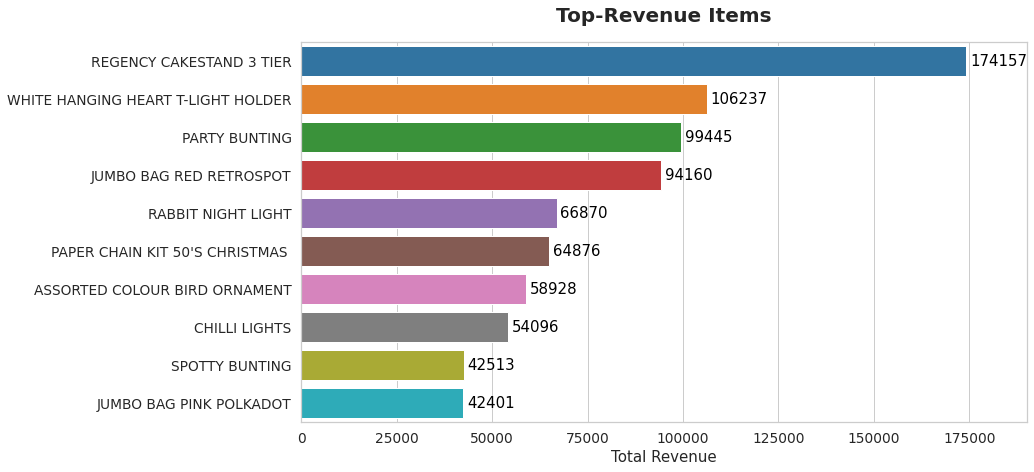

In [141]:
# Prepare Data
top_rev_items=(order.groupby(['description'])
           ['revenue'].sum().reset_index()
           .sort_values(by='revenue', ascending=False).head(10))

#sns.set_context('notebook', font_scale=1.35)
sns.set_style("whitegrid")

# Plot a graph
plt.figure(figsize=(13,7))

sns.barplot(x='revenue',y='description', data=top_rev_items)

for i, v in enumerate(top_rev_items.revenue):
    plt.text(v+1000, i, str(round(v)), color='black', va="center")

plt.title("Top-Revenue Items",fontsize=20,fontweight="bold", pad=20)
#plt.ylabel('Category')
plt.xlabel('Total Revenue')
plt.ylabel(None)
#sns.despine(left=True)
plt.xlim(0,190000)
plt.show()

Top-Revenue Items

- REGENCY CAKESTAND 3 TIER, 174157
- WHITE HANGING HEART T-LIGHT HOLDER, 106237
- PARTY BUNTING, 99445
- JUMBO BAG RED RETROSPOT, 94160
- RABBIT NIGHT LIGHT, 66870

-------------------

pip install fsspec

order_dash=order[order.unitprice>0]

order_dash.to_csv("C://Users//jenya//Desktop//tabeau_orders.csv") 

-------------------

**Summary**

- After looking a the data vidually we were able to see specefic problematic data entries and deal with them.
- We comapred each month in terms of products, orders, costumers and revenue and we found out the November 2019 is the highest months in all categories
- There are no invoices at the end of 2018, probably because of end of the year holiday season.


       -product price
       
- Only 24 products are above 50.
- Only 7 products are priced above 100, and only 2 are proced above 200:

- 2 products that are priced above 200:

VINTAGE RED KITCHEN CABINET

VINTAGE BLUE KITCHEN CABINET

- 4 products are priced above 100 but less than 200:

RUSTIC SEVENTEEN DRAWER SIDEBOARD

REGENCY MIRROR WITH SHUTTERS

LOVE SEAT ANTIQUE WHITE METAL

CHEST NATURAL WOOD 20 DRAWERS

- Mostly all of the products are priced 50 or less, 3931 out of 3937.
- 1885 purchases are basically free of charge, price 0.
- 162405 purchases are concidred cheap, not more than 1.25.
- 87130 purchases are medium priced, more than 1.25 but less than 2.07.
- 140600 purchases are high priced, more tha n 2.07 and less than 4.13.
- 111961 puchases are at top price, more than 4.13 and less than 9.94.
- 29025 of the puchases were the top 5% of the data, tagged as elite and more expansive than 9.94.

        - Order quantity
       
- 90% of orders had less than 24 products per order,and more than 50% of orders have 2-3 products.
- 95% of order cncellations had less than 36 products per order, and more than 50% of orders cancellations had 1-2 products.
- nearly all  order and cancellation range lays between 100 products per order and 180 products per cacellation.
- Accessories product category has the most products ordered, 25% of total order quantity.


        - Product categories
        
533000 rows - devided into 8 categories

largest categories are kitchen depot, accessories and house depot.


- kitchen_depot with 127831 orders, 24% of all orders, 2573422 of generated revenue.

- accessories with 122455 orders, 22% of all orders. 2125127 of generated revenue.

- home_depot with 113991 orders, 21% of all orders. 2599123 of generated revenue.

- misc with 74972 orders, 14% of all orders. 1023186 of generated revenue.

- kids_depot with 29054 orders, 5% of all orders. 530776 of generated revenue.

- Vintage with 27184 orders, 5% of all orders. 464263 of generated revenue.

- Christmas with 24954 orders, 4% of all orders. 460079 of generated revenue.

- garden with 12559 orders, 2% of all orders. 189190 of generated revenue.


Overall prodcut quantity in orders:

- Accessories 25%
- Kitchen_depot 21% 
- Home_depot 21%
- Misc 15%
- Chrismas 6%
- Vinatge 5%
- Kids_depot 5%
- Garden 1%


most revenue came for these price range groups:

- High medium price range, 2719923 with 138345 orders 26.3% of total
- High price range, 2578071 with 109986 orders 20.9% of total
- Cheap price range, 1933143 with 162404 orders 30.5% of total
- Medium price range, 1772475 with 85714 orders 16.3% of total
- elite price range, 28082 with 28082 orders 5.3% of total
- free price range, 1878 with 1878 orders 0.3% of total

Top-5 products with most quantity sold

- WORLD WAR 2 GLIDERS ASSTD DESIGNS, 53751
- JUMBO BAG RED RETROSPOT, 4720
- POPCORN HOLDER, 36322
- ASSORTED COLOUR BIRD ORNAMENT, 36282
- PACK OF 72 RETROSPOT CAKE CASES, 36016 

Top-5 most frequently canceled items

- REGENCY CAKESTAND 3 TIER 180
- JAM MAKING SET WITH JARS 87
- SET OF 3 CAKE TINS PANTRY DESIGN 73
- STRAWBERRY CERAMIC TRINKET BOX 54
- ROSES REGENCY TEACUP AND SAUCER 54

Top 10 the most frequently ordered items:

- WHITE HANGING HEART T-LIGHT HOLDER, 2315
- JUMBO BAG RED RETROSPOT, 2112
- REGENCY CAKESTAND 3 TIER, 2009
- PARTY BUNTING, 1700
- LUNCH BAG RED RETROSPOT, 1581
- ASSORTED COLOUR BIRD ORNAMENT, 1476
- SET OF 3 CAKE TINS PANTRY DESIGN, 1396
- PACK OF 72 RETROSPOT CAKE CASES, 1352
- LUNCH BAG BLACK SKULL, 1301
- NATURAL SLATE HEART CHALKBOARD, 1255

Top-Revenue Items

- REGENCY CAKESTAND 3 TIER, 174157 of revenue
- WHITE HANGING HEART T-LIGHT HOLDER, 106237 of revenue
- PARTY BUNTING, 99445 of revenue
- JUMBO BAG RED RETROSPOT, 94160 of revenue
- RABBIT NIGHT LIGHT, 66870 of revenue

        -holiday season and rest of the year

During holiday season there are more Hope_depo purchases than in the rest of the year.

Chrismas category is increased to the top 5 ordered groups in both orders and product quantity.

During the rest of the year, Kichen_depot category has the most orders and Accesories categorry has the largest product quantity per order. 

in holiday season, most ordered products beloged to home_depot category
- POPCORN HOLDER
- RABBIT NIGHT LIGHT

Rest of the year  most ordered products beloged to accessories category
- WORLD WAR 2 GLIDERS ASSTD DESIGNS	
- JUMBO BAG RED RETROSPOT

-------------------------
**Hypothesis analysis**


- Differences in average product price between home_depot and kitchen_depot categories.

- Differences in average revenue between home_depot and kitchen_depot categories.

- Differences in average quantity between home_depot, kitchen_depot and accessories categories.

----------------------

- Differences in average product price between home_depot and kitchen_depot categories.

H0: There is no segnificant difference in average product price between home_depot and kitchen_depot categories

H1: There is a segnificant difference in average product price between home_depot and kitchen_depot categories 

In [142]:
# Creating groups for the test:
home_pr=order[order['product_category']=='home_depot']['unitprice']
kitchen_pr=order[order['product_category']=='kitchen_depot']['unitprice']
home_pr_mean= home_pr.mean()
kitchen_pr_mean= kitchen_pr.mean()

# Checking the length of each sample
print(len(home_pr))
print(home_pr_mean)
print()
print(len(kitchen_pr))
print(kitchen_pr_mean)

111846
3.92433

124947
3.9396985


In [143]:
stat, p = ttest_ind(home_pr,kitchen_pr)
print('stat=%.3f, p=%.3f' % (stat, p))
print("{0:.3f}".format(home_pr.mean()/kitchen_pr.mean()-1)) 

if p > 0.05:
    print('There is no significant difference in average product price between home_depot and kitchen_depot categories')
else:
    print('There is a significant difference in average product price between home_depot and kitchen_depot categories')

stat=-0.805, p=0.421
-0.004
There is no significant difference in average product price between home_depot and kitchen_depot categories


We cants reject the null hypothesis as there is no significant difference in average product price between home_depot and kitchen_depot categories.

The relative difference between the 2 sample is too small, 0.042.

-----------------

- Differences in average revenue between home_depot and kitchen_depot categories.

H0: There is no significant difference in average product price between home_depot and kitchen_depot categories

H1: There is a significant difference in average product price between home_depot and kitchen_depot categories 

In [144]:
# Creating groups for the test:
home_ar=order[order['product_category']=='home_depot']['revenue']
kitchen_ar=order[order['product_category']=='kitchen_depot']['revenue']
home_ar_mean= home_ar.mean()
kitchen_ar_mean= kitchen_ar.mean()

# Checking the length of each sample
print(len(home_ar))
print(len(kitchen_ar))
print(home_ar_mean)
print(kitchen_ar_mean)

111846
124947
23.238413
20.59611


In [145]:
stat, p = ttest_ind(home_ar,kitchen_ar)
print('stat=%.3f, p=%.3f' % (stat, p))
print("{0:.3f}".format(home_ar.mean()/kitchen_ar.mean()-1)) 
if p > 0.05:
    print('There is no significant difference in average product price between home_depot and kitchen_depot categories')
else:
    print('There is a significant difference in average product price between home_depot and kitchen_depot categories')

stat=8.146, p=0.000
0.128
There is a significant difference in average product price between home_depot and kitchen_depot categories


Null hypothesis is rejecteed since there is a significant difference in average product price between home_depot and kitchen_depot categories.

There is more than home_depot average order mean is higher by 12% the average order means of kitchen_depot category.

-----------------

- Differences in average quantity between home_depot, kitchen_depot and accessories categories.

H0: There are no significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.

H1: There are significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.

In [146]:
# Creating groups for the test:
home_q=order[order['product_category']=='home_depot']['quantity']
kitchen_q=order[order['product_category']=='kitchen_depot']['quantity']
accessory_q=order[order['product_category']=='accessories']['quantity']

home_q_mean= home_q.mean()
kitchen_q_mean= kitchen_q.mean()
accessory_q_mean= accessory_q.mean()

# Checking the length of each sample
print(len(home_q))
print(home_q_mean)

print(len(kitchen_q))
print(kitchen_q_mean)

print(len(accessory_q))
print(accessory_q_mean)

111846
10.222842122203744
124947
9.093135489447526
120864
11.013858551760656


In [147]:
stat, p = f_oneway(home_q, kitchen_q, accessory_q)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('There are no significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.')
else:
    print('There are significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.')

stat=75.219, p=0.000
There are significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.


We reject Null hypothesis since there There are significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.

- kitchen_depot order quantity mean is 21% lower than of accessories order quantity mean. 
- The difference between accessories category order quantity mean is that home_depot order quantity mean is lower by 7% 
- kitchen_depot order quantity mean is 12% lower than of home_depot order quantity mean.

In [148]:
print("{0:.4f}".format(accessory_q.mean()/home_q.mean()-1)) 
print("{0:.4f}".format(accessory_q.mean()/kitchen_q.mean()-1)) 
print("{0:.4f}".format(home_q.mean()/kitchen_q.mean()-1)) 

0.0774
0.2112
0.1242


**Summary**

According to the hypothesis tests:

- We cants reject the null hypothesis as there is no significant difference in average product price between home_depot and kitchen_depot categories.

    - There is more than home_depot average order mean is higher by 12% the average order means of kitchen_depot category.


- We reject Null hypothesis since there There are significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.

    - kitchen_depot order quantity mean is 21% lower than of accessories order quantity mean. 
    - The difference between accessories category order quantity mean is that home_depot order quantity mean is lower by 7% 
    - kitchen_depot order quantity mean is 12% lower than of home_depot order quantity mean.

---------------------------

**Overview**

- The range of dates in the data is staring from 2018-11-29 until 2019-12-07 that is a total of 373 days.
- The filtered data contains 534415 rows, including returns/cancellation/fees etc. 
- There are missing values in customerid column.
- Quantity column has negative values that look like the they have equivalent positive values, could be a return items perhaps. 
- theres 5268 duplicates in the data, we might remove them for their small amount. 
- Missing values in descripion column that are need to checked.
- Descriptions are written in CAPS.
- lowcasing of several columns is required.
- 2515 zero values in UnitPrice column - maybe theres an explanation in other columns on the row.
- CostumerID column has 25% missing values. 
- After looking a the data vidually we were able to see specefic problematic data entries and deal with them.
- We comapred each month in terms of products, orders, costumers and revenue and we found out the November 2019 is the highest months in all categories
- There are no invoices at the end of 2018, probably because of end of the year holiday season.
- Now the data is clean and we can continue to categorize it and look for insights.
- 9 products per order on average
- 5 invoices per customer on average
- profit of 406 per invoice on average


       -product price
       
- Only 24 products are priced above 50.
- Only 7 products are priced above 100, and only 2 are priced above 200:

- 2 products that are priced above 200:

    - VINTAGE RED KITCHEN CABINET

    - VINTAGE BLUE KITCHEN CABINET

- 4 products are priced above 100 but less than 200:

    - RUSTIC SEVENTEEN DRAWER SIDEBOARD

    - REGENCY MIRROR WITH SHUTTERS

    - LOVE SEAT ANTIQUE WHITE METAL

    - CHEST NATURAL WOOD 20 DRAWERS

- Mostly all of the products are priced 50 or less, 3931 out of 3937.
- 1885 purchases are basically free of charge, price 0.
- 162405 purchases are concidred cheap, not more than 1.25.
- 87130 purchases are medium priced, more than 1.25 but less than 2.07.
- 140600 purchases are high priced, more tha n 2.07 and less than 4.13.
- 111961 puchases are at top price, more than 4.13 and less than 9.94.
- 29025 of the puchases were the top 5% of the data, tagged as elite and more expansive than 9.94.

        - Order quantity
       
- 90% of orders had less than 24 products per order,and more than 50% of orders have 2-3 products.
- 95% of order cncellations had less than 36 products per order, and more than 50% of orders cancellations had 1-2 products.
- nearly all  order and cancellation range lays between 100 products per order and 180 products per cacellation.
- Accessories product category has the most products ordered, 25% of total order quantity.


        - Product categories
        
- 533000 rows - devided into 8 categories

- largest categories are kitchen depot, accessories and house depot.

- kitchen_depot with 127831 orders, 24% of all orders, 2573422 of generated revenue.

- accessories with 122455 orders, 22% of all orders. 2125127 of generated revenue.

- home_depot with 113991 orders, 21% of all orders. 2599123 of generated revenue.

- misc with 74972 orders, 14% of all orders. 1023186 of generated revenue.

- kids_depot with 29054 orders, 5% of all orders. 530776 of generated revenue.

- Vintage with 27184 orders, 5% of all orders. 464263 of generated revenue.

- Christmas with 24954 orders, 4% of all orders. 460079 of generated revenue.

- garden with 12559 orders, 2% of all orders. 189190 of generated revenue.


Overall prodcut quantity in orders:

- Accessories 25%
- Kitchen_depot 21% 
- Home_depot 21%
- Misc 15%
- Chrismas 6%
- Vinatge 5%
- Kids_depot 5%
- Garden 1%


most revenue came for these price range groups:

- High medium price range, 2719923 with 138345 orders 26.3% of total
- High price range, 2578071 with 109986 orders 20.9% of total
- Cheap price range, 1933143 with 162404 orders 30.5% of total
- Medium price range, 1772475 with 85714 orders 16.3% of total
- elite price range, 28082 with 28082 orders 5.3% of total
- free price range, 1878 with 1878 orders 0.3% of total

Top-5 products with most quantity sold

- WORLD WAR 2 GLIDERS ASSTD DESIGNS, 53751
- JUMBO BAG RED RETROSPOT, 4720
- POPCORN HOLDER, 36322
- ASSORTED COLOUR BIRD ORNAMENT, 36282
- PACK OF 72 RETROSPOT CAKE CASES, 36016 

Top-5 most frequently canceled items

- REGENCY CAKESTAND 3 TIER 180
- JAM MAKING SET WITH JARS 87
- SET OF 3 CAKE TINS PANTRY DESIGN 73
- STRAWBERRY CERAMIC TRINKET BOX 54
- ROSES REGENCY TEACUP AND SAUCER 54

Top 10 the most frequently ordered items:

- WHITE HANGING HEART T-LIGHT HOLDER, 2315
- JUMBO BAG RED RETROSPOT, 2112
- REGENCY CAKESTAND 3 TIER, 2009
- PARTY BUNTING, 1700
- LUNCH BAG RED RETROSPOT, 1581
- ASSORTED COLOUR BIRD ORNAMENT, 1476
- SET OF 3 CAKE TINS PANTRY DESIGN, 1396
- PACK OF 72 RETROSPOT CAKE CASES, 1352
- LUNCH BAG BLACK SKULL, 1301
- NATURAL SLATE HEART CHALKBOARD, 1255

Top-Revenue Items

- REGENCY CAKESTAND 3 TIER, 174157 of revenue
- WHITE HANGING HEART T-LIGHT HOLDER, 106237 of revenue
- PARTY BUNTING, 99445 of revenue
- JUMBO BAG RED RETROSPOT, 94160 of revenue
- RABBIT NIGHT LIGHT, 66870 of revenue

        -holiday season and rest of the year

- During holiday season there are more Hope_depo purchases than in the rest of the year.

- Chrismas category is increased to the top 5 ordered groups in both orders and product quantity.

- During the rest of the year, Kichen_depot category has the most orders and Accesories categorry has the largest product quantity per order. 

- After looking a the data vidually we were able to see specefic problematic data entries and deal with them.
- We comapred each month in terms of products, orders, costumers and revenue and we found out the November 2019 is the highest months in all categories
- There are no invoices at the end of 2018, probably because of end of the year holiday season.

- in holiday season, most ordered products beloged to home_depot category
    - POPCORN HOLDER
    - RABBIT NIGHT LIGHT

- Rest of the year  most ordered products beloged to accessories category
    - WORLD WAR 2 GLIDERS ASSTD DESIGNS	
    - JUMBO BAG RED RETROSPOT
    
           -Hypothesis analysis
           
- We cants reject the null hypothesis as there is no significant difference in average product price between home_depot and kitchen_depot categories.

    - There is more than home_depot average order mean is higher by 12% the average order means of kitchen_depot category.


- We reject Null hypothesis since there There are significant Differences in average quantity between home_depot, kitchen_depot and accessories categories.

    - kitchen_depot order quantity mean is 21% lower than of accessories order quantity mean. 
    - The difference between accessories category order quantity mean is that home_depot order quantity mean is lower by 7% 
    - kitchen_depot order quantity mean is 12% lower than of home_depot order quantity mean.


- Notes and reccomendation

    - Medium high prices generate more revenue than high price or low prices. mybe lowering several high priced items will increase their sales.
    - According to price range metrics, customers prefer to buy more of the product when the price of the product is lower. Maybe a bundles program(Buy X get Y for lower price) can be created to increase the revenue troughout the year.
    - Castumers to purchase more home_depot products during holiday season. given that Kitchen depot category generates more revenue on holiday season and sells less it can be profitable to promote this category more on holiday season since its much shorter than rest of the year and has high order rate.
    
    - `A reccomendation for future data management`, a specified column for non-purchases, or transitions, that will represent returns/cancellations/manual transitions etc. This column will help in maintaining a better database organization and better modularity.
    
    - `A reccomendation for future data management`, a product category column is really helpfull is organizing the data